![image](https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png)


# **Customer Segmentation of the UK-based Online Retail using RFM Analysis and K-Means**

**by Harish Muhammad**

## **Business Understanding**

### **Context**

**Online retail**

Online retail or e-commerce refers to the process of buying and selling consumer goods or services over the internet to earn profit. This model of commerce allows customers to browse, select, and purchase products from online stores, often with the convenience of home delivery. The industry has experienced exponential growth in recent years, fueled by advancements in technology and shifting consumer behavior towards digital shopping platforms. Online retailers operate in a highly competitive environment, where understanding customer behavior is crucial for sustaining growth and profitability. Unlike traditional retail, online retail businesses have access to vast amounts of customer data, including purchase history, browsing behavior, and demographic information. Leveraging this data effectively can provide insights into customer preferences, shopping patterns, and spending habits, which are essential for creating personalized shopping experiences and targeted marketing campaigns. Online retailers generate revenue primarily through product sales, but their profitability depends on efficiently managing customer acquisition costs, optimizing marketing efforts, and maximizing customer lifetime value. To achieve this, it is essential for online retailers to understand the diverse needs and behaviors of their customers.


**Customer Segmentation**

Customer Segmentation is crucial for online retail because it allows businesses to understand and cater to the diverse needs of their customers. By grouping customers based on their behavior, such as purchasing frequency, recent activity, and spending amount, retailers can create targeted marketing strategies that resonate with specific segments. This personalized approach not only improves customer satisfaction but also increases sales and customer retention, as it ensures that the right products and offers are presented to the right customers at the right time. Additionally, segmentation helps retailers operate their marketing costs efficiently as each customer segment typically incurs a different marketing cost. This variation arises because different segments have distinct behaviors, preferences, and levels of responsiveness to marketing efforts. In general, customers can vary by segment as:

**High-Value Segments**
* Segments like "Best Customers" or "Big Spenders" usually justify higher marketing costs. These customers generate significant revenue, so investing more in personalized marketing campaigns, loyalty programs, and exclusive offers is worthwhile. The goal is to retain these valuable customers and encourage repeat purchases.

**At-Risk or Lost Segments**
* Segments such as "Almost Lost" or "Lost Customers" may require targeted re-engagement campaigns, which can be more costly per customer due to the need for special incentives or offers to win them back.

**Low-Value or Price-Sensitive Segments**
* Segments like "Lost Cheap Customers" might not justify high marketing expenditure. Marketing strategies for these customers might focus on low-cost channels, automated email campaigns, or broad, less personalized promotions to minimize costs.

**Loyal Customers**
* For "Loyal Customers," the cost can be moderate, focusing on maintaining engagement through rewards programs, regular communication, and consistent value offerings. The cost is lower than acquiring new customers but still requires investment to maintain their loyalty.


**Segmentation Analysis**

Data science techniques like RFM analysis and K-means clustering can contribute significant role in this customer segmentation process. RFM analysis helps retailers identify their most valuable customers by analyzing recency, frequency, and monetary value, making it easier to focus efforts on those who are most likely to generate revenue. On the other hand, K-means clustering, an unsupervised machine learning method, can uncover hidden patterns and group similar customers together based on multiple attributes. This enables businesses to understand different customer segments more deeply and tailor their strategies accordingly, leading to more effective marketing and improved customer experiences.

**Problem Statement**

In this competitive online retail landscape, understanding customer diversity and tailoring marketing strategies to different customer segments is a critical challenge. Business must be able to identify and prioritize high-value customers while also re-engaging at-risk or lost customers. Without effective segmentation, marketing efforts can become inefficient, leading to wasted resources and missed opportunities to enhance customer loyalty and increase revenue. The ability to perform customer segmentation allows business to allocate marketing resources more effectively, optimize promotional strategies, and deliver personalized experiences that resonate with each customer group.



**Goals**

Based on the identified problem, an online retail company, based in the United Kingdom, aims to implement a data-driven approach to customer segmentation. The goal is to develop a segmentation model that categorizes customers into distinct groups based on their purchasing behavior, frequency of transactions, and monetary value. By doing so, the company seeks to enhance its marketing strategies, improve customer retention, and ultimately boost profitability. The segmentation will be based on RFM (Recency, Frequency, Monetary) analysis and unsupervised machine learning techniques such as K-means clustering to ensure that each customer segment is accurately identified and targeted.

**Analytical Approach**

We will begin by analyzing the online retail data to identify patterns in customer purchasing behavior. This analysis will involve calculating RFM metrics to categorize customers based on their recency of purchase, frequency of transactions, and monetary value of their purchases. Following this, we will apply K-means clustering to group customers into distinct segments. Each segment will be analyzed to determine the most effective marketing strategies for that group. The insights gained from this segmentation will enable the online retail company to personalize its marketing efforts, improve customer engagement, and optimize its overall business performance.

## **Data Understanding and Data Cleaning**

* The dataset is originated from the published [scientific article]('https://link.springer.com/article/10.1057/dbm.2012.17#Sec9') on 27th August 2012 in the journal of Database Marketing and customer Strategy Management.
* The dataset can be accessed through this link: [Online retail dataset]('https://archive.ics.uci.edu/dataset/352/online+retail'). It contains anonymous customer transactional data from a UK-based online retail enterprise or e-commerce.
* Each rows contains transaction detail including the transaction date, invoice number, product price, quantity, Etc.



**Initiating set up**

In [ ]:
# Installing library
#!pip install category_encoders
#!pip install catboost
#!pip install Lime
!pip install feature_engine # winsorizer
!pip install squarify
# All library above is not available in google colab

In [ ]:
# Initial set up

# Import required libraries for data wrangling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import missingno as mo
import squarify
from plotly import graph_objects as go

import datetime

# statistics
from scipy import stats
from scipy.stats import boxcox
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Machine learning
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# Customizing with 'ggplot' style
plt.style.use('ggplot')



In [ ]:
# loading data
url = 'https://raw.githubusercontent.com/harishmuh/CustomerSegmentation_OnlineRetail_RFM_KMeans/main/Online%20Retail.xlsx'
df = pd.read_excel(url)

# Displaying the first three rows of data
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
# Displayin the last three rows of data
df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Reviewing the name of columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Types of data
df.dtypes.to_frame(name="Data Types")

,Data Types
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


The description of each column from the dataset can be seen as below:

- **InvoiceNo:**  
  A unique identifier assigned to each transaction or invoice. This number indicates a specific sale made by the company.

- **StockCode:**  
  A unique identifier for each item (product) in the inventory. This code is used to track products.

- **Description:**  
  A brief textual description of the product. This provides an overview of the item being sold.

- **Quantity:**  
  The number of units of the product that were purchased in a given transaction. This can be positive (purchases) or negative (returns).

- **InvoiceDate:**  
  The date and time when the transaction was made. This is used to track when the sale occurred.

- **UnitPrice:**  
  The price per unit of the product. This is the cost of a single item in the transaction.

- **CustomerID:**  
  A unique identifier assigned to each customer. This is used to track purchases made by individual customers.

- **Country:**  
  The delivery address country where the customer resides, mainly UK. This indicates the geographic location of the customer at the time of the transaction.

In [ ]:
# Calculating the number of rows and columns
# Dataframe dimension
print(f'Number of rows and columns {df.shape}')

Number of rows and columns (541909, 8)


**Unique Values**

In [ ]:
# Summarizing data
# Initial assessment
# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value_sum': df.isna().sum(),
    'missing_value_pct': round((df.isna().sum() / len(df)) * 100, 2),
    'negative_value': [(df[col] < 0).any() if df[col].dtype in ['int64', 'float64'] else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

assessment_data

,feature,data_type,missing_value_sum,missing_value_pct,negative_value,n_unique,sample_unique
InvoiceNo,InvoiceNo,object,0,0.00,False,25900,"[536365, 536366, 536367, 536368, 536369, 536370, 536371, 536372, 536373, 536374, 536375, 536376, 536377, 536378, 536380, 536381, C536379, 536382, C536383, 536384, 536385, 536386, 536387, 536388, 536389, 536390, C536391, 536392, 536393, 536394, 536395, 536396, 536397, 536398, 536399, 536400, 536401, 536402, 536403, 536404, 536405, 536406, 536407, 536408, 536409, 536412, 536414, 536415, 536416, 536420, 536423, 536425, 536437, 536446, 536460, 536463, 536464, 536466, 536477, 536488, 536500, 536502, 536508, C536506, 536514, 536520, 536521, 536522, 536523, 536524, 536525, 536526, 536527, 536528, 536529, 536530, 536531, 536532, 536533, 536534, 536535, 536536, 536537, 536538, 536539, 536540, 536541, 536542, C536543, 536544, 536545, 536546, 536547, C536548, 536549, 536550, 536551, 536552, 536553, 536554, ...]"
StockCode,StockCode,object,0,0.00,False,4070,"[85123A, 71053, 84406B, 84029G, 84029E, 22752, 21730, 22633, 22632, 84879, 22745, 22748, 22749, 22310, 84969, 22623, 22622, 21754, 21755, 21777, 48187, 22960, 22913, 22912, 22914, 21756, 22728, 22727, 22726, 21724, 21883, 10002, 21791, 21035, 22326, 22629, 22659, 22631, 22661, 21731, 22900, 21913, 22540, 22544, 22492, POST, 22086, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494L, 21258, 22114, 21733, 22386, 85099C, 21033, 20723, 84997B, 84997C, 21094, 20725, 21559, 22352, 21212, 21975, 21977, 84991, 84519A, 85183B, 85071B, 21931, 21929, 22961, 22139, 84854, 22411, 82567, 21672, 22774, 22771, 71270, 22262, 22637, 21934, 21169, 21166, 21175, 37444A, 37444C, 22083, 84971S, 47580, 22261, 84832, ...]"
Description,Description,object,1454,0.27,False,4223,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE METAL LANTERN, CREAM CUPID HEARTS COAT HANGER, KNITTED UNION FLAG HOT WATER BOTTLE, RED WOOLLY HOTTIE WHITE HEART., SET 7 BABUSHKA NESTING BOXES, GLASS STAR FROSTED T-LIGHT HOLDER, HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT, ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE KITCHEN, FELTCRAFT PRINCESS CHARLOTTE DOLL, IVORY KNITTED MUG COSY , BOX OF 6 ASSORTED COLOUR TEASPOONS, BOX OF VINTAGE JIGSAW BLOCKS , BOX OF VINTAGE ALPHABET BLOCKS, HOME BUILDING BLOCK WORD, LOVE BUILDING BLOCK WORD, RECIPE BOX WITH METAL HEART, DOORMAT NEW ENGLAND, JAM MAKING SET WITH JARS, RED COAT RACK PARIS FASHION, YELLOW COAT RACK PARIS FASHION, BLUE COAT RACK PARIS FASHION, BATH BUILDING BLOCK WORD, ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELIKE GREEN, PANDA AND BUNNIES STICKER SHEET, STARS GIFT TAPE , INFLATABLE POLITICAL GLOBE , VINTAGE HEADS AND TAILS CARD GAME , SET/2 RED RETROSPOT TEA TOWELS , ROUND SNACK BOXES SET OF4 WOODLAND , SPACEBOY LUNCH BOX , LUNCH BOX I LOVE LONDON, CIRCUS PARADE LUNCH BOX , CHARLOTTE BAG DOLLY GIRL DESIGN, RED TOADSTOOL LED NIGHT LIGHT, SET 2 TEA TOWELS I LOVE LONDON , VINTAGE SEASIDE JIGSAW PUZZLES, MINI JIGSAW CIRCUS PARADE , MINI JIGSAW SPACEBOY, MINI PAINT SET VINTAGE , POSTAGE, PAPER CHAIN KIT 50'S CHRISTMAS , EDWARDIAN PARASOL RED, RETRO COFFEE MUGS ASSORTED, SAVE THE PLANET MUG, VINTAGE BILLBOARD DRINK ME MUG, VINTAGE BILLBOARD LOVE/HATE MUG, WOOD 2 DRAWER CABINET WHITE FINISH, WOOD S/3 CABINET ANT WHITE FINISH, WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRAME ANTIQUE WHITE , VICTORIAN SEWING BOX LARGE, HOT WATER BOTTLE TEA AND SYMPATHY, RED HANGING HEART T-LIGHT HOLDER, JUMBO BAG PINK POLKADOT, JUMBO BAG BAROQUE BLACK WHITE, JUMBO BAG CHARLIE AND LOLA TOYS, STRAWBERRY CHARLOTTE BAG, RED 3 PIECE RETROSPOT CUTLERY SET, BLUE 3 PIECE POLKADOT CUTLERY SET, SET/6 RED SPOTTY PAPER PLATES, LUNCH BAG RED RETROSPOT, STRAWBERRY LUNCH BOX WITH CUTLERY, LUNCH BOX WITH CUTLERY RETROSPOT , PACK OF 72 RETROSPOT CAKE CASES, PACK OF 60 DINOSAUR CAKE CASES, PACK OF 60 PINK PAISLEY CAKE CASES, 60 TEATIME FAIRY CAKE CASES, TOMATO CHARLIE+LOLA COASTER SET, CHARLIE & LOLA WASTEPAPER BIN FLOR

In [ ]:
# Reviewing statistical descriptive
display(df.describe().T, df.describe(include='O').T)

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


Based on the observation of unique values and statistical descriptive, we notice that:
* There are 38 countries mentioned. As we only interested to the country origin of majority customer (from the United Kingdom (UK)), we will delete the rests.
* The 'InvoiceDate' data type is object, we will convert it into date time
* The min and max value for 'Quantity' is -80995 and 80995, this could attributed to cancelled or returned orders.
* The 'UnitPrice' have negative values that may represent cancelled orders or bad-debt by retailers.
* These anomalies will be handled in next steps.

### **Selecting the UK customers**

**Reviewing the country origin of the customers**

In [ ]:
# Reviewing the proportion of customer origin
df.Country.value_counts(normalize=True).to_frame()

,proportion
Country,
United Kingdom,0.914320
Germany,0.017521
France,0.015790
EIRE,0.015124
Spain,0.004674
Netherlands,0.004375
Belgium,0.003818
Switzerland,0.003694
Portugal,0.002803


* It turns out that the majority of customers (more than 90%) originated from the United Kingdom. As our interest to make customer segmentation of UK, we will select only the UK data.

In [ ]:
# Selecting the customer segmentation from the UK
df = df[df['Country']=='United Kingdom']


### **Handling anomalies**

**Removing rows with 'Quantity' less than zero**

In [ ]:
# Displaying the rows with anomaly in 'Quantity'
df_quantity_anomaly = df[df.Quantity < 0]
print(f'The number of rows with Quantity less than zero are {len(df_quantity_anomaly)} or {round(len(df_quantity_anomaly)*100/len(df),2)}% of total dataset ')
df_quantity_anomaly.head(3)

The number of rows with Quantity less than zero are 9192 or 1.86% of total dataset 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom


In [ ]:
# Removing rows with anomaly in 'Quantity'
df = df[df['Quantity'] > 0]

**Removing rows with 'UnitPrice' less than zero**

In [ ]:
# Displaying the rows with anomaly in 'UnitPrice'
df_unitprice_anomaly = df[df['UnitPrice'] < 0]
print(f'The number of rows with Quantity less than zero are {len(df_unitprice_anomaly)} or {round(len(df_unitprice_anomaly)*100/len(df),3)}% of total dataset ')
df_unitprice_anomaly.head()

The number of rows with Quantity less than zero are 2 or 0.0% of total dataset 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
# Removing rows with anomaly in 'UnitPrice'
df = df[df['UnitPrice'] > 0]

In [ ]:
# Resetting the index of the selected DataFrame
df = df.reset_index(drop = True)

### **Correcting data type format of 'InvoiceDate'**

In [ ]:
# converting data type from the columns of 'InvoiceDate' into datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d.%m.%Y %H:%M:%S')

In [ ]:
# Checking the data type of the converted columns
print(f"Data type of 'InvoiceDate' column: {df['InvoiceDate'].dtypes}")

Data type of 'InvoiceDate' column: datetime64[ns]


In [ ]:
print(f'The beginning period of the data:{df["InvoiceDate"].min()}')
print(f'The end period of the data:{df["InvoiceDate"].max()}')
print(f'The observed duration is {(df["InvoiceDate"].max()-df["InvoiceDate"].min()).days} days (from 2010 to 2011 transaction period)')

The beginning period of the data:2010-12-01 08:26:00
The end period of the data:2011-12-09 12:49:00
The observed duration is 373 days (from 2010 to 2011 transaction period)


### **Checking and Handling duplicates**

In [ ]:
# Checking the number of duplicated data
print(f"Total number of duplicated data: {df.duplicated().sum()}")
print(f"Percentage of duplicated data: {df.duplicated().sum()/len(df)*100:.2f}%")

Total number of duplicated data: 5138
Percentage of duplicated data: 1.06%


In [ ]:
# Handling duplicated data

# Dropping duplicates and resetting the index
df = df.drop_duplicates(ignore_index=True)

### **Detecting missing values**

In [ ]:
# Calculating the number of missing values
df.isnull().sum().to_frame(name="Missing Values")

,Missing Values
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,130782
Country,0


In [ ]:
# Calculating the percentage of missing values from columns
df_miss_percent = df.isna().sum()* 100/len(df)
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'})

,Percentage of Missing values
InvoiceNo,0.000000
StockCode,0.000000
Description,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,27.247101
Country,0.000000


**Visualization of missing values**

Based on previous observation, we notice there are missing values in the column of customer ID. Now, we want to visualize these missing values to figure out any pattern or relationship of these missing values within dataset.   

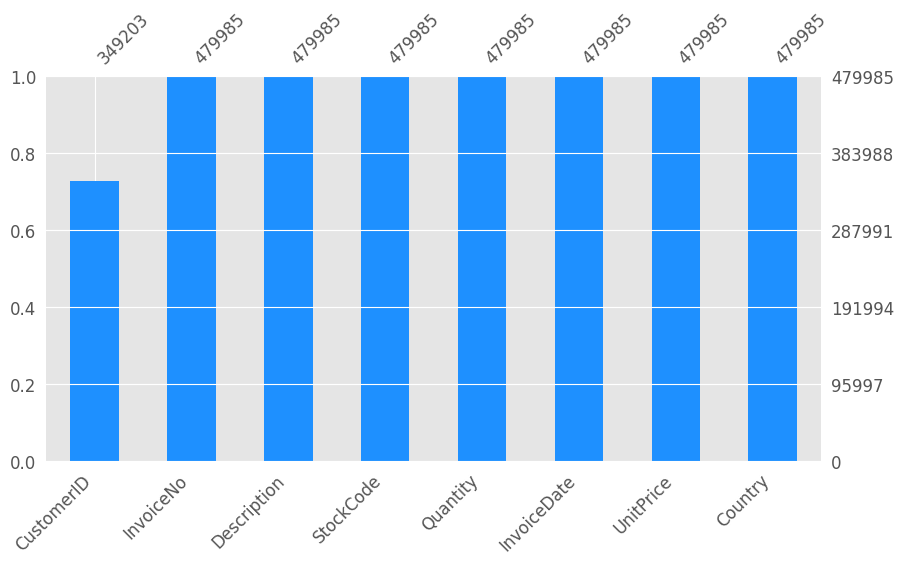

In [ ]:
# Visualization of missing value proportion to overall data
mo.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

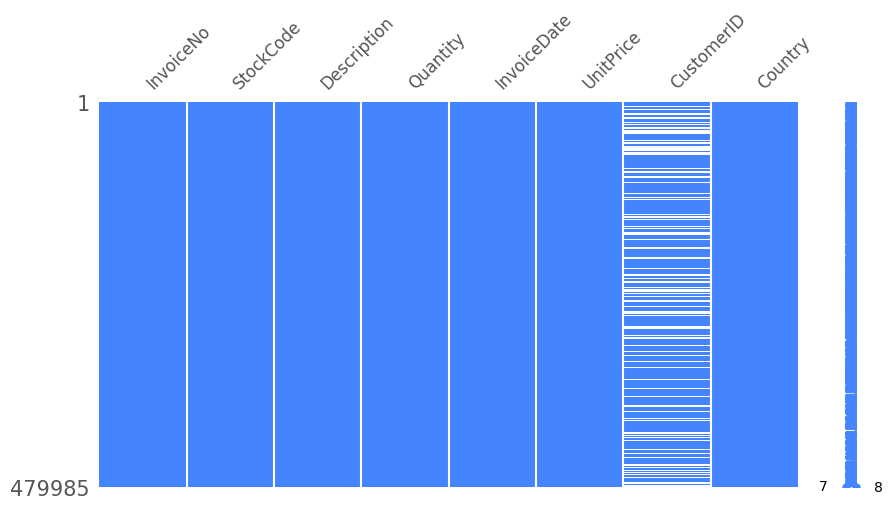

In [ ]:
# Visualization of missing values with Matrix plot
mo.matrix(df, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
plt.show()

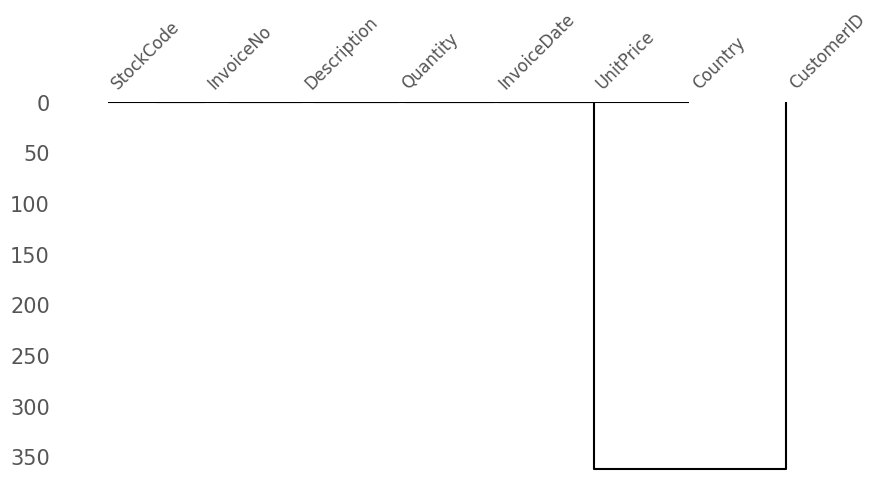

In [ ]:
# Visualizatio of missing values with dendogram
mo.dendrogram(df, figsize=(10,5), fontsize=12)
plt.show()

* After visualizing and reviewing missing values, we still cannot figure out how to fill the missing values of the 'CustomerID'. Therefore, we decided to drop it for the purpose of further analysis with machine learning.

In [ ]:
# Removing all rows with missing values
df_clean = df.dropna(subset=['CustomerID'], ignore_index=True).copy()

In [ ]:
# Rechecking the missing values from the cleaned dataset
df_miss_percent = df_clean.isna().sum()* 100/len(df_clean)
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'})

,Percentage of Missing values
InvoiceNo,0.0
StockCode,0.0
Description,0.0
Quantity,0.0
InvoiceDate,0.0
UnitPrice,0.0
CustomerID,0.0
Country,0.0


In [ ]:
# Reviewing the summary of the cleaned dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349203 entries, 0 to 349202
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349203 non-null  object        
 1   StockCode    349203 non-null  object        
 2   Description  349203 non-null  object        
 3   Quantity     349203 non-null  int64         
 4   InvoiceDate  349203 non-null  datetime64[ns]
 5   UnitPrice    349203 non-null  float64       
 6   CustomerID   349203 non-null  float64       
 7   Country      349203 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.3+ MB


In [ ]:
# Statistical summary of the cleaned dataset
display(df_clean.describe().T, df_clean.describe(include='O').T)

,count,mean,min,25%,50%,75%,max,std
Quantity,349203.0,12.145672,1.0,2.0,4.0,12.0,80995.0,190.628818
InvoiceDate,349203,2011-07-11 03:25:52.818962176,2010-12-01 08:26:00,2011-04-07 11:40:00,2011-07-31 13:37:00,2011-10-23 11:07:30,2011-12-09 12:49:00,NaN
UnitPrice,349203.0,2.972328,0.001,1.25,1.95,3.75,8142.75,17.990908
CustomerID,349203.0,15548.384252,12346.0,14191.0,15518.0,16931.0,18287.0,1594.384044


,count,unique,top,freq
InvoiceNo,349203,16646,576339,542
StockCode,349203,3645,85123A,1936
Description,349203,3844,WHITE HANGING HEART T-LIGHT HOLDER,1929
Country,349203,1,United Kingdom,349203


## **Exploratory Data Analysis**

**Numerical and categorical columns**

In [ ]:
# defining numerical and categorical columns

# Identifying numerical columns (excluding datetime and object types) and excluding 'CustomerID' (We do not use ID for EDA observation)
numerical = [var for var in df.columns if df_clean[var].dtypes in ['int64', 'float64'] and var != 'CustomerID']
# Identifying categorical colums that contains 'object'
categorical = [var for var in df.columns if df_clean[var].dtypes in ['object']]

pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical, numerical]
})

,Column Type,Columns
0,Categorical,"[InvoiceNo, StockCode, Description, Country]"
1,Numerical,"[Quantity, UnitPrice]"


**Histogram**

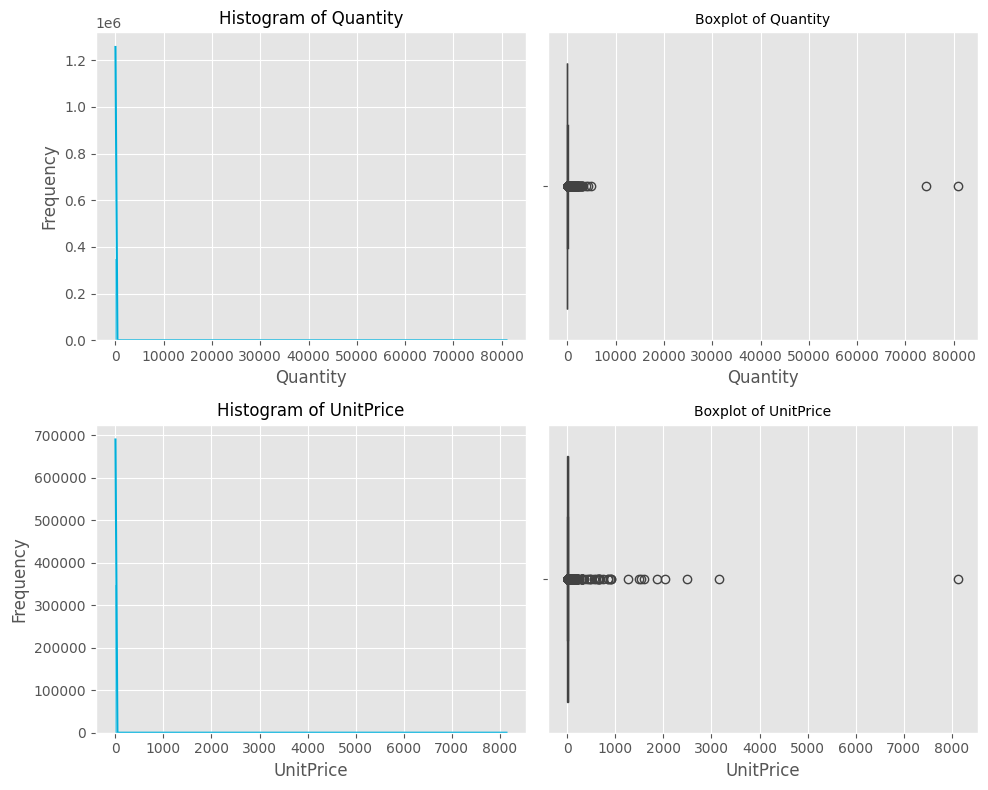

In [ ]:
# Creating histogram for the numerical data
plt.figure(figsize=(10, 8))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df_clean[col], kde=True, color='#00b0db', bins=500)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=df_clean[col], color='#00b0db')
    plt.title(f'Boxplot of {col}', size=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

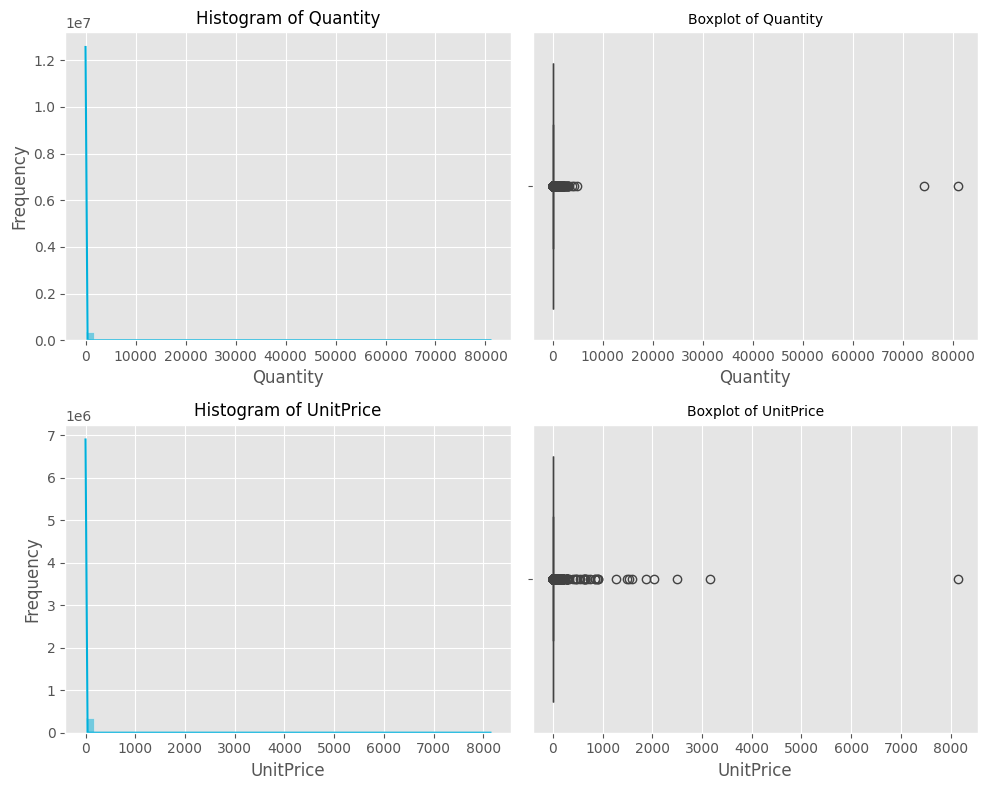

In [ ]:
# Creating histogram for the numerical data
plt.figure(figsize=(10, 8))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(df_clean[col], kde=True, color='#00b0db', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=df_clean[col], color='#00b0db')
    plt.title(f'Boxplot of {col}', size=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### **Data distribution**

In [ ]:
# Normal test, skewness and data distribution of numerical data

# Identifying numerical columns (excluding datetime and object types) and excluding 'ID'
numerical = [var for var in df_clean.columns if df_clean[var].dtypes in ['int64', 'float64'] and var != 'CustomerID']

from scipy.stats import normaltest

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = normaltest(df[feature_name].dropna())

    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    skewness = df_clean[feature_name].skew()

    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"

    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature",
                                                     "D'Agostino-Pearson Statistic",
                                                     "P-value",
                                                     "Distribution",
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,Quantity,2.933304e+06,0.0,Not Normally Distributed,388.810660,Right Skew
1,UnitPrice,2.455481e+06,0.0,Not Normally Distributed,305.200785,Right Skew


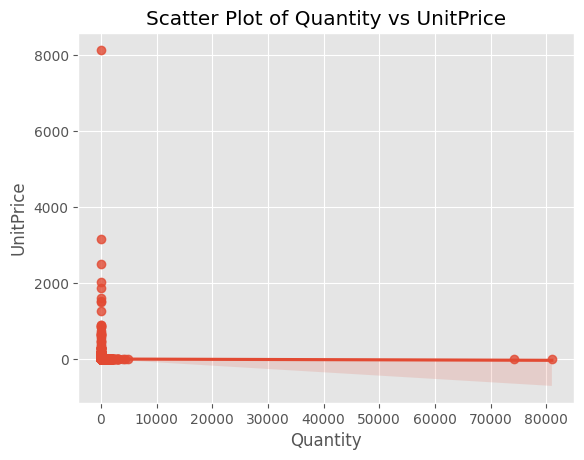

In [ ]:
# Correlation of numerical features
sns.regplot(x='Quantity', y='UnitPrice', data=df_clean)

# Adding a title
plt.title('Scatter Plot of Quantity vs UnitPrice')

# Show the plot
plt.show()

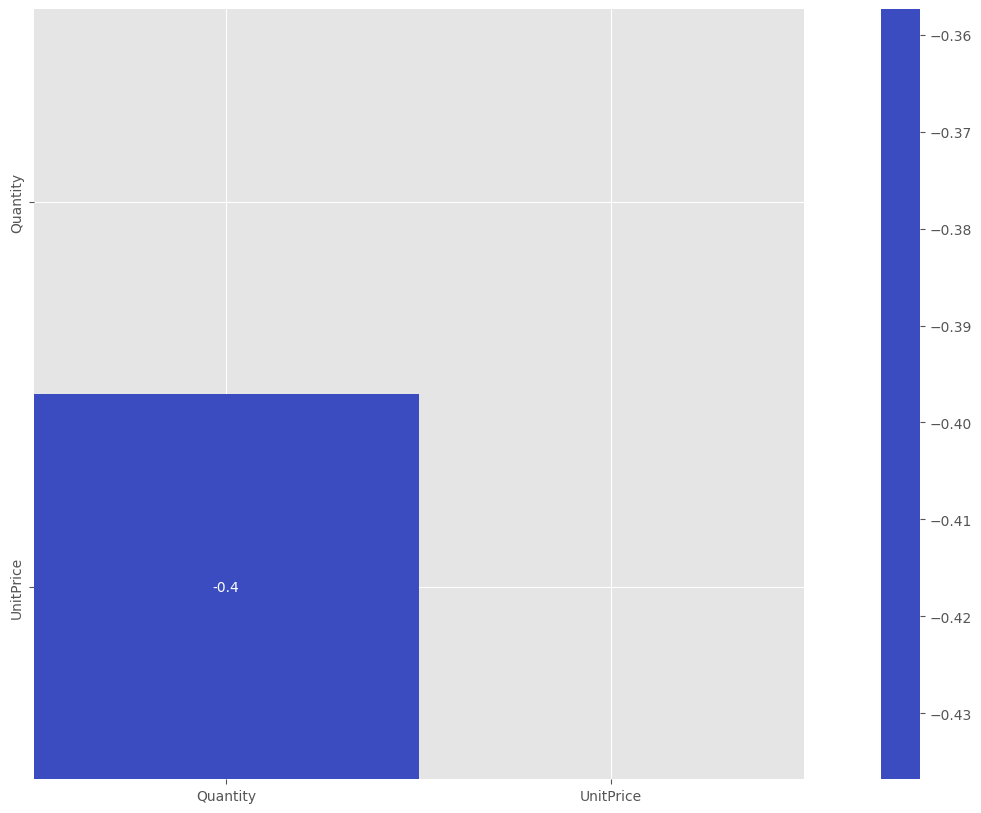

In [ ]:
# Correlation between features
plt.figure(figsize=(20, 10))

matrix = np.triu(df_clean[numerical].corr(method='spearman'))

sns.heatmap(data=df_clean[numerical].corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

**Outlier Check**

In [ ]:
# Calculating outliers and their percentage in features
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in df_clean.columns if df_clean[var].dtypes in ['int64', 'float64'] and var != 'CustomerID']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df_clean, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df_clean[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Quantity,20218,5.79,-13.0,27.0
1,UnitPrice,28904,8.28,-2.5,7.5


* We recognize that our dataset contain outliers. We have found outliers on numerical columns by percentage from 5 to 8%. However, we do not want to remove outliers yet as they may harbour important information. We will conduct winsorizer for handling outlier in later step.

**Mulitcollinearity Check**

In [ ]:
# Check multicollinearity
def calc_vif(df_clean):
    # Selecting numerical columns
    numerical = [var for var in df_clean.columns if df_clean[var].dtype in ['int64', 'float64'] and var != 'CustomerID']

    # Creating a DataFrame for the selected numerical columns
    df_numerical = df_clean[numerical]

    vif = pd.DataFrame()
    vif['variable'] = df_numerical.columns
    vif['VIF'] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]
    vif['Multicollinearity tendency'] = np.where(vif['VIF'] < 4, 'yes', 'no')
    return vif

# Run the VIF calculation and sort the results
vif_df = calc_vif(df_clean).sort_values(by='VIF', ascending=False)

# Display the result
vif_df


,variable,VIF,Multicollinearity tendency
0,Quantity,1.000036,yes
1,UnitPrice,1.000036,yes


**Reviewing cardinality**

In [ ]:
# Reviewing cardinality

# Identifying categorical colums that contains 'object'
eda_categorical = [var for var in df_clean.columns if df_clean[var].dtypes in ['object']]

# creating a function to check cardinality
def check_cardinality(data):
    cardinality_info = []

    for feature in eda_categorical:
        cardinality = len(data[feature].unique())
        warning = "High" if cardinality > 10 else "Low"
        cardinality_info.append({'Feature': feature, 'Cardinality': cardinality, 'Cardinality tendency': warning})

    return pd.DataFrame(cardinality_info)

cardinality_data = check_cardinality(df_clean)
cardinality_data

,Feature,Cardinality,Cardinality tendency
0,InvoiceNo,16646,High
1,StockCode,3645,High
2,Description,3844,High
3,Country,1,Low


## **Data Analysis**

### **Calculating product sold overtime**

In [ ]:
# Calculating number of products sold every month
# Create a new column for year and month
df_clean['InvoiceYearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

# Grouping by the new 'YearMonth' column and summing up the quantity
monthly_product_sold = df_clean.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

# Displaying the result
monthly_product_sold

,InvoiceYearMonth,Quantity
0,2010-12,266573
1,2011-01,277650
2,2011-02,212792
3,2011-03,275385
4,2011-04,259592
5,2011-05,301113
6,2011-06,280321
7,2011-07,301552
8,2011-08,310101
9,2011-09,453420


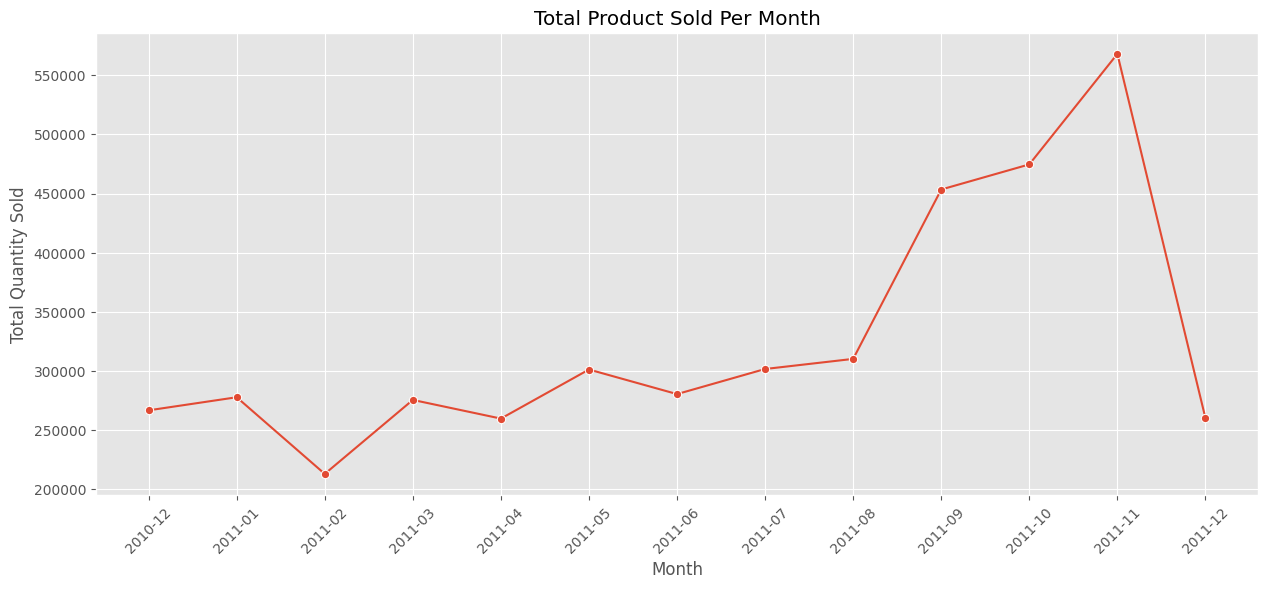

In [ ]:
# Visualizing the product sold overtime
plt.figure(figsize=(15, 6))

# Using Seaborn to plot
sns.lineplot(x=monthly_product_sold['InvoiceYearMonth'].astype(str), y=monthly_product_sold['Quantity'], marker='o')

plt.title('Total Product Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Creating the line plot
fig = go.Figure()

# Adding the line trace
fig.add_trace(go.Scatter(x=monthly_product_sold['InvoiceYearMonth'].astype(str),
                         y=monthly_product_sold['Quantity'],
                         mode='lines+markers',
                         name='Total Quantity Sold'))

# Define x-axis tick values and labels
tick_values = monthly_product_sold['InvoiceYearMonth'].astype(str)
tick_labels = [tick.split('-')[0] + '-' + tick.split('-')[1] for tick in tick_values]

# Adding titles and labels
fig.update_layout(
    title='Total Product Quantity Sold Per Month',
    xaxis_title='Month',
    yaxis_title='Total Quantity Sold',
    xaxis_tickvals=tick_values[::1],  # Display one label per month
    xaxis_ticktext=tick_labels[::1],  # Customize the labels to show only year-month
    xaxis_tickangle=-45,  # Rotating x-axis labels
    template='plotly'
)

# Show the plot
fig.show()

### **Calculating revenue overtime**

In [ ]:
# Calculating Revenue
# Revenue = Order per quantity * Average Revenue per Order

df_clean['Revenue'] = df_clean['Quantity']*df_clean['UnitPrice']

In [ ]:
df_revenue = df_clean.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue

,InvoiceYearMonth,Revenue
0,2010-12,496477.340
1,2011-01,440876.330
2,2011-02,354618.200
3,2011-03,465784.190
4,2011-04,408733.111
5,2011-05,550359.350
6,2011-06,523775.590
7,2011-07,484545.591
8,2011-08,497194.910
9,2011-09,794806.692


In [ ]:
# Revenue by month

# Create the line plot
fig = go.Figure()

# Add line trace with markers
fig.add_trace(go.Scatter(
    x=df_revenue['InvoiceYearMonth'].astype(str),
    y=df_revenue['Revenue'],
    mode='lines+markers',  # Show both line and markers
    name='Monthly Revenue'
))

# Update layout
fig.update_layout(
    title='Monthly Revenue',
    xaxis_title='Month',
    yaxis_title='Revenue',
    xaxis_tickvals=df_revenue['InvoiceYearMonth'].astype(str),  # Set x-axis ticks to match months
    xaxis_ticktext=[f'{date.split("-")[0]}-{date.split("-")[1]}' for date in df_revenue['InvoiceYearMonth'].astype(str)],  # Format labels as Year-Month
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
    template='plotly'
)

# Show the plot
fig.show()


### **Data Modeling: Recency, Frequency, and Monetary values (RFM) analysis**

RFM analysis is a powerful technique for segmenting customers based on their purchasing behavior. By evaluating how recently, frequently, and how much customers spend, this method helps identify high-value customers who contribute significantly to revenue.

* **Recency**: Measures the time elapsed since a customer last made a purchase. A shorter duration indicates higher engagement.

* **Frequency**: Assesses how often a customer makes a purchase. Higher frequency suggests greater loyalty and regular engagement.

* **Monetary Value**: Calculates the total amount of money a customer has spent. Customers with higher spending are considered more valuable.

By analyzing these three dimensions, businesses can better understand customer behavior and tailor their strategies to maximize revenue and customer retention.

**Initial date**

The last invoice date is 2011–12–09, we will use this date to calculate Recency.

In [ ]:
# Determining the start of analysis date
analysis_date = df_clean['InvoiceDate'].max() + datetime.timedelta(1)
analysis_date

Timestamp('2011-12-10 12:49:00')

In [ ]:
df_rfm = df_clean.groupby('CustomerID', as_index=False).agg(
    customer_age = ('InvoiceDate', lambda x: (analysis_date-x.min()).days),
    recency =  ('InvoiceDate', lambda x: (analysis_date-x.max()).days),
    frequency = ('CustomerID', lambda x: len(x)),
    monetary =  ('Revenue', lambda x: x.sum()),
    avg_spend_per_product = ('UnitPrice', lambda x: x.mean()),
)

df_rfm.head()

,CustomerID,customer_age,recency,frequency,monetary,avg_spend_per_product
0,12346.0,326,326,1,77183.60,1.040000
1,12747.0,369,2,103,4196.01,4.367864
2,12748.0,374,1,4412,33053.19,2.671874
3,12749.0,213,4,199,4090.88,4.999950
4,12820.0,327,3,59,942.34,1.904746


**Data Modelling: Calculating RFM quantiles**

* We'll segment the metrics by dividing them into quantiles.
* Each Recency, Frequency, and Monetary metric will be assigned a score from 1 to 4, with lower scores indicating better metric performance for the business.
* The final RFM score (overall value) will be determined by combining the individual scores for Recency, Frequency, and Monetary metrics.

**Calculation of quantiles and visualization of metric distribution**

In [ ]:
# Copying dataframe
segmented_rfm = df_rfm.copy()

In [ ]:
# Function to calculate R, F, M score

# Define the quantiles
quantiles = segmented_rfm.quantile(q=[0.25, 0.50, 0.75])

# RScore calculation
def RScore(value, quantiles, metric):
    if value <= quantiles[metric][0.25]:
        return 1
    elif value <= quantiles[metric][0.5]:
        return 2
    if value <= quantiles[metric][0.75]:
        return 3
    else:
        return 4

# FMScore calculation
def FMScore(value, quantiles, metric):
    if value <= quantiles[metric][0.25]:
        return 4
    elif value <= quantiles[metric][0.5]:
        return 3
    if value <= quantiles[metric][0.75]:
        return 2
    else:
        return 1

In [ ]:
# Apply the scoring functions
segmented_rfm['R_quartile'] = segmented_rfm['recency'].apply(lambda x: RScore(x, quantiles, 'recency'))
segmented_rfm['F_quartile'] = segmented_rfm['frequency'].apply(lambda x: FMScore(x, quantiles, 'frequency'))
segmented_rfm['M_quartile'] = segmented_rfm['monetary'].apply(lambda x: FMScore(x, quantiles, 'monetary'))

segmented_rfm.head()

,CustomerID,customer_age,recency,frequency,monetary,avg_spend_per_product,R_quartile,F_quartile,M_quartile
0,12346.0,326,326,1,77183.60,1.040000,4,4,1
1,12747.0,369,2,103,4196.01,4.367864,1,1,1
2,12748.0,374,1,4412,33053.19,2.671874,1,1,1
3,12749.0,213,4,199,4090.88,4.999950,1,1,1
4,12820.0,327,3,59,942.34,1.904746,1,2,2


In [ ]:
# Creating RFM segment and FRM_score

# RFM segment
segmented_rfm['RFM_segment'] = (segmented_rfm['R_quartile'].astype(str) +
    segmented_rfm['F_quartile'].astype(str) +
    segmented_rfm['M_quartile'].astype(str)
)

# RFM Score
segmented_rfm['RFM_score'] = (
    segmented_rfm['R_quartile'] +
    segmented_rfm['F_quartile'] +
    segmented_rfm['M_quartile']
)

# Displaying the first rows to display the result
segmented_rfm.head()

,CustomerID,customer_age,recency,frequency,monetary,avg_spend_per_product,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_score
0,12346.0,326,326,1,77183.60,1.040000,4,4,1,441,9
1,12747.0,369,2,103,4196.01,4.367864,1,1,1,111,3
2,12748.0,374,1,4412,33053.19,2.671874,1,1,1,111,3
3,12749.0,213,4,199,4090.88,4.999950,1,1,1,111,3
4,12820.0,327,3,59,942.34,1.904746,1,2,2,122,5


**Calculating the total RFM score combined**

RFM_Score = R_quartile + F_quartile + M_quartile

In [ ]:
# Placing labels based on the customer segments
def label_rfm(segmented_rfm):
    if segmented_rfm['RFM_segment'] == '111':
        return 'Best Customers'
    elif segmented_rfm['RFM_segment'] == '134':
        return 'Almost Lost'
    elif segmented_rfm['RFM_segment'] == '444':
        return 'Lost Customers'
    elif segmented_rfm['RFM_segment'] == '344':
        return 'Lost Cheap Customers'
    elif segmented_rfm['F_quartile'] == '1':
        return 'Loyal Customers'
    elif segmented_rfm['M_quartile'] == '1':
        return 'Big Spenders'
    else:
        return 'Others'

# Adding label to the dataframe
segmented_rfm['RFM_label'] = segmented_rfm.apply(label_rfm, axis=1)

# Display the first few rows with the new labels
segmented_rfm.head()

,CustomerID,customer_age,recency,frequency,monetary,avg_spend_per_product,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_score,RFM_label
0,12346.0,326,326,1,77183.60,1.040000,4,4,1,441,9,Others
1,12747.0,369,2,103,4196.01,4.367864,1,1,1,111,3,Best Customers
2,12748.0,374,1,4412,33053.19,2.671874,1,1,1,111,3,Best Customers
3,12749.0,213,4,199,4090.88,4.999950,1,1,1,111,3,Best Customers
4,12820.0,327,3,59,942.34,1.904746,1,2,2,122,5,Others


In [ ]:
# Function to label RFM segments
def label_rfm(row):
    if row['RFM_segment'] == '111':
        return 'Best Customers'
    elif row['F_quartile'] == 1:
        return 'Loyal Customers'
    elif row['M_quartile'] == 1:
        return 'Big Spenders'
    elif row['RFM_segment'] == '134':
        return 'Almost Lost'
    elif row['RFM_segment'] == '344':
        return 'Lost Customers'
    elif row['RFM_segment'] == '444':
        return 'Lost Cheap Customers'
    else:
        return 'Others'

# Adding label to the dataframe
segmented_rfm['RFM_label'] = segmented_rfm.apply(label_rfm, axis=1)

# Display the first few rows with the new labels
segmented_rfm.head()

,CustomerID,customer_age,recency,frequency,monetary,avg_spend_per_product,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_score,RFM_label
0,12346.0,326,326,1,77183.60,1.040000,4,4,1,441,9,Big Spenders
1,12747.0,369,2,103,4196.01,4.367864,1,1,1,111,3,Best Customers
2,12748.0,374,1,4412,33053.19,2.671874,1,1,1,111,3,Best Customers
3,12749.0,213,4,199,4090.88,4.999950,1,1,1,111,3,Best Customers
4,12820.0,327,3,59,942.34,1.904746,1,2,2,122,5,Others


In [ ]:
# Calculating Each RFM Label categories
segmented_rfm['RFM_label'].value_counts().to_frame()

,count
RFM_label,
Others,2145
Loyal Customers,555
Best Customers,414
Lost Cheap Customers,342
Big Spenders,275
Lost Customers,166
Almost Lost,23


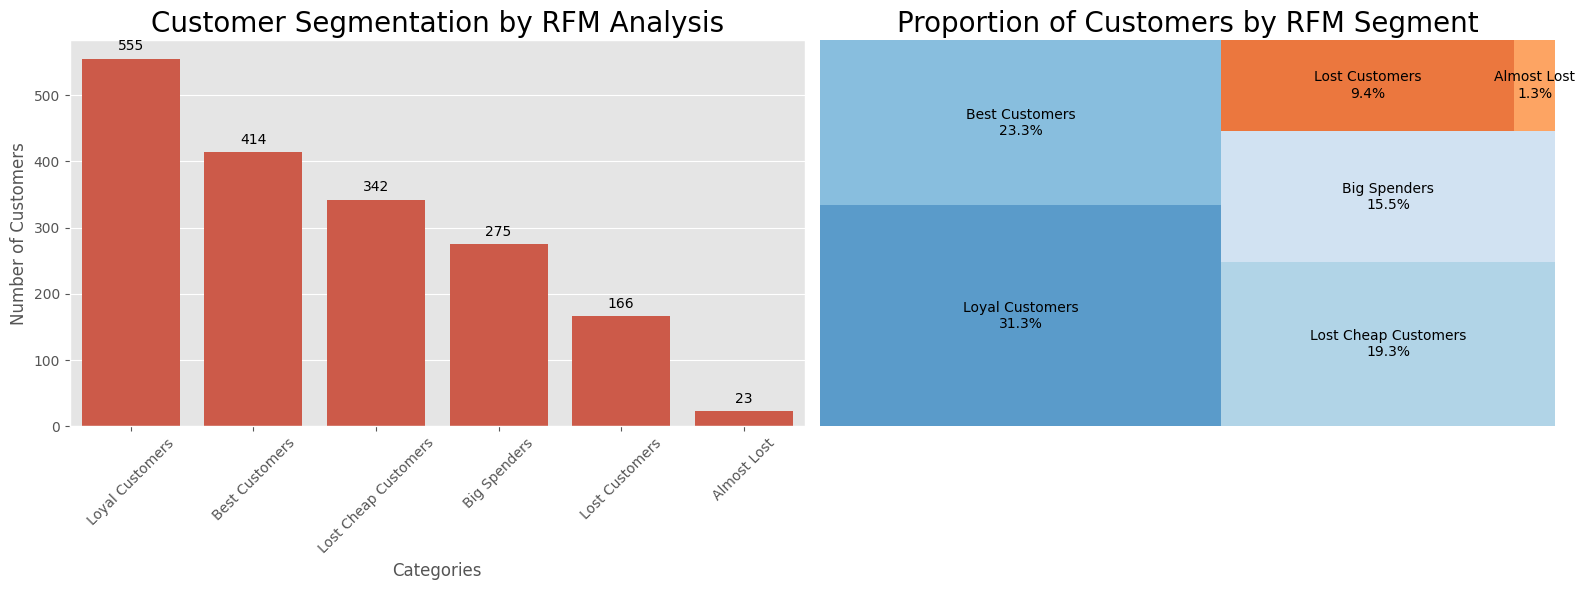

In [ ]:
# RFM Segmentation

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calculating Each RFM Label category counts
RFM_label_counts = segmented_rfm['RFM_label'].value_counts()

# Dropping the first label category
RFM_label_counts.drop(RFM_label_counts.index[0], inplace=True)

# Plotting bar plot
sns.countplot(x='RFM_label', data=segmented_rfm, order=RFM_label_counts.index, ax=axes[0])
axes[0].set_title('Customer Segmentation by RFM Analysis', fontsize=20)
axes[0].set_xlabel('Categories', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel('Number of Customers')

# Function to annotate bars
def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# Annotate bars in the first subplot
annotate_bars(axes[0])

# Calculating the percentage for the treemap
percentages = (RFM_label_counts / RFM_label_counts.sum()) * 100

# Plotting treemap
sizes = percentages.values
labels = [f'{label}\n{size:.1f}%' for label, size in zip(RFM_label_counts.index, percentages)]

# Create a treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8, ax=axes[1], color=plt.cm.tab20c.colors)
axes[1].set_title('Proportion of Customers by RFM Segment', fontsize=20)
axes[1].axis('off')  # Turn off axis

# Displaying the plots
plt.tight_layout()
plt.show()



### **Data Modeling: K-Means Clustering Analysis**

K-Means clustering algorithm is an unsupervised machine learning method that groups unlabeled data into K distinct clusters. It works by repeatedly assigning each data point to just one cluster, ensuring that the points within each cluster are as similar to each other as possible.

To Perform clustering with K-Means, we need to consider the optimal conditions of this algorithm such as,
* **Normal or Symmetric Distribution**: K-Means clustering tends to perform better when the data features have a roughly normal or symmetric distribution. This is because K-Means relies on calculating means, which are most representative when the data is symmetrically distributed around the center.
* **Low Skewness**: Data with high skewness can lead to distorted cluster centers because the mean is influenced by outliers and skewed distributions. If the data is highly skewed, it’s often beneficial to apply a transformation (e.g., log transformation, Box-Cox transformation) to reduce the skewness before clustering.
* **Homogeneous Spread**: K-Means assumes that the spread (variance) within each cluster is similar. If one cluster has a much larger spread than others, the algorithm may not properly capture the underlying structure of the data. This can be partially mitigated by scaling the data so that all features contribute equally to the distance calculations.
* **Limited Outliers**: K-Means is sensitive to outliers because it uses mean values to define the center of each cluster. Outliers can skew these means, leading to poor clustering results. It’s best to remove or minimize outliers before applying K-Means.
* **Scaling**: K-Means uses Euclidean distance as a measure, so it’s important that all features are on the same scale. If the features have different units or ranges, standardization or normalization should be performed before clustering.


Based on the previous explanation, we will check the condition of our data before applying K-means

**Selecting features**

In [ ]:
# Create a new DataFrame df_crm with the selected columns
columns_to_keep = ['recency', 'frequency', 'monetary']
rfm_kmeans = segmented_rfm[columns_to_keep].copy()

rfm_kmeans.head()

,recency,frequency,monetary
0,326,1,77183.60
1,2,103,4196.01
2,1,4412,33053.19
3,4,199,4090.88
4,3,59,942.34


In [ ]:
# Statistical descriptive
rfm_kmeans.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,3920.0,92.208418,99.533854,1.00,18.000,51.000,143.000,374.0
frequency,3920.0,89.082398,214.034542,1.00,17.000,40.000,98.000,7676.0
monetary,3920.0,1858.424654,7478.631256,3.75,298.185,644.975,1571.285,259657.3


**Correlation**

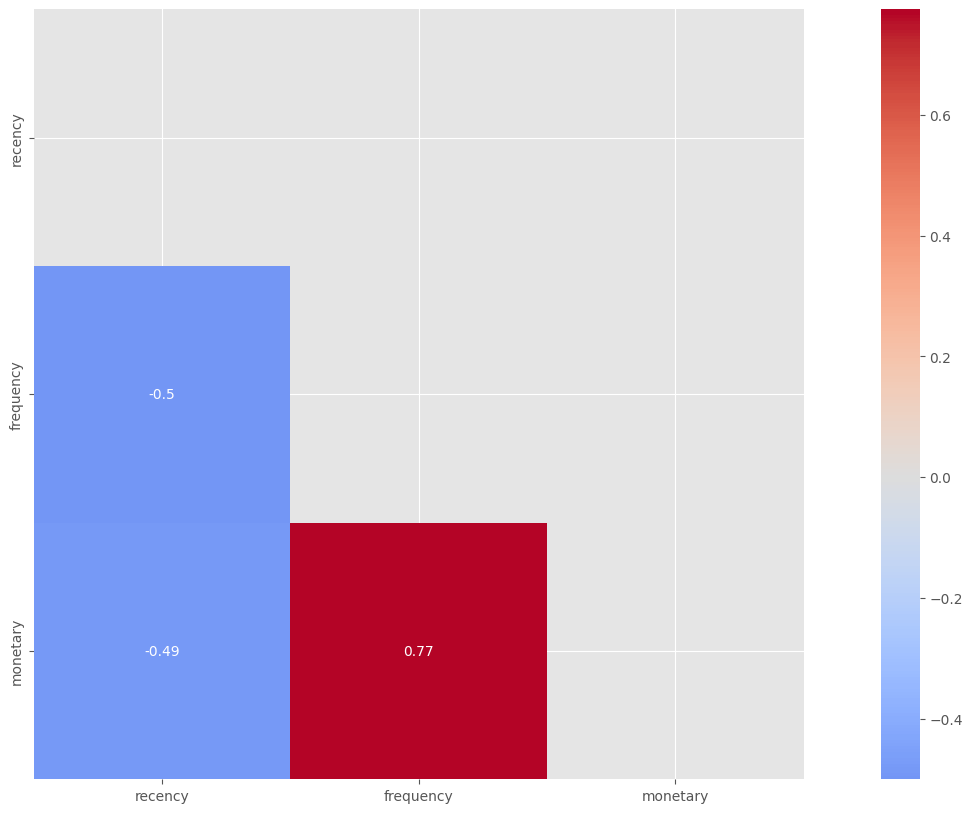

In [ ]:
# Heatmap correlation

# Correlation between features
plt.figure(figsize=(20, 10))

matrix = np.triu(rfm_kmeans.corr(method='spearman')) # Spearman correlation as data is not normally distributed

sns.heatmap(data=rfm_kmeans.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

* Monetary and Frequency (0.77): Strong positive relationship. Higher spending is associated with more frequent purchases.
* Recency and Monetary (-0.49): Moderate negative relationship. Longer time since the last purchase is associated with lower spending.
* Recency and Frequency (-0.5): Moderate negative relationship. Longer time since the last purchase is associated with lower purchase frequency.

**Outlier check**

In [ ]:
# Calculating outliers and their percentage in features
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Columns to check for outliers
numerical = ['recency', 'frequency', 'monetary']

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(rfm_kmeans, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(rfm_kmeans[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,recency,132,3.37,-169.500,330.500
1,frequency,340,8.67,-104.500,219.500
2,monetary,381,9.72,-1611.465,3480.935


* We have observed the data and these columns contain outliers from 3% to almost 10%. To optimize K-means performance, we will handle these outliers using winsorization.

**Handling outliers**

We will use winsorizing method to handle outliers. Winsorizing is a method used to handle outliers by limiting extreme values in a dataset. The goal is to reduce the influence of outliers on statistical analyses without completely discarding the data. This method is crucial because it helps to stabilize statistical measures (like mean and variance) and can improve the robustness of statistical models and analyses. As our data is more likely not normally distributed, We will use 'iqr' as capping method. We will use two tail options for handling outliers in both sides

In [ ]:
# Initialize the Winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5,  variables=['recency', 'frequency', 'monetary'])

# Fit and transform the DataFrame
rfm_kmeans = winsorizer.fit_transform(rfm_kmeans)

**Data distribution check**

Now we will check the distribution of our data visually by using histogram and statistically by using normality test

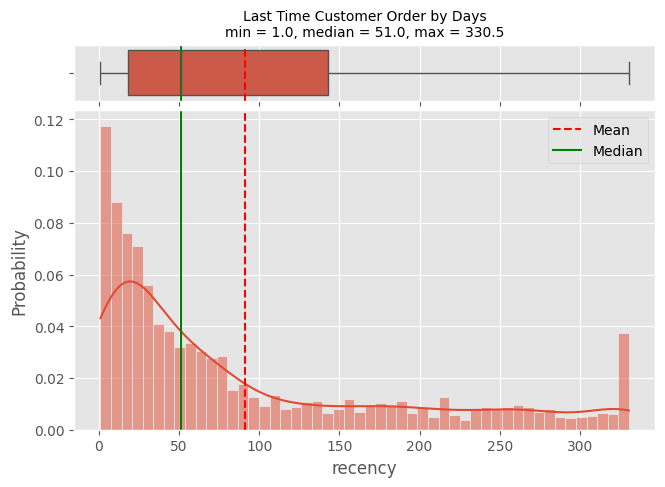

Q1 = 18.0
Q2 = 51.0
Q3 = 143.0


In [ ]:
# Recency data distribution
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5, 5),
                               gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Title for the boxplot
ax1.set_title(f"Last Time Customer Order by Days\n"
              f"min = {rfm_kmeans['recency'].min()}, "
              f"median = {rfm_kmeans['recency'].median()}, "
              f"max = {rfm_kmeans['recency'].max()}",
              color="black", fontsize=10)

# Boxplot for recency
sns.boxplot(x=rfm_kmeans['recency'], ax=ax1)
ax1.axvline(rfm_kmeans['recency'].mean(), color='r', linestyle='--', label='Mean')
ax1.axvline(rfm_kmeans['recency'].median(), color='g', linestyle='-', label='Median')
ax1.set(xlabel="")

# Histogram for recency
sns.histplot(data=rfm_kmeans['recency'], ax=ax2, stat="probability", kde=True, bins=50)
ax2.axvline(rfm_kmeans['recency'].mean(), color='r', linestyle='--', label='Mean')
ax2.axvline(rfm_kmeans['recency'].median(), color='g', linestyle='-', label='Median')

# Add a legend to the plot
ax2.legend()

# Display the plot
plt.show()

# Print quantiles
print(f"Q1 = {rfm_kmeans['recency'].quantile(0.25)}")
print(f"Q2 = {rfm_kmeans['recency'].quantile(0.5)}")
print(f"Q3 = {rfm_kmeans['recency'].quantile(0.75)}")


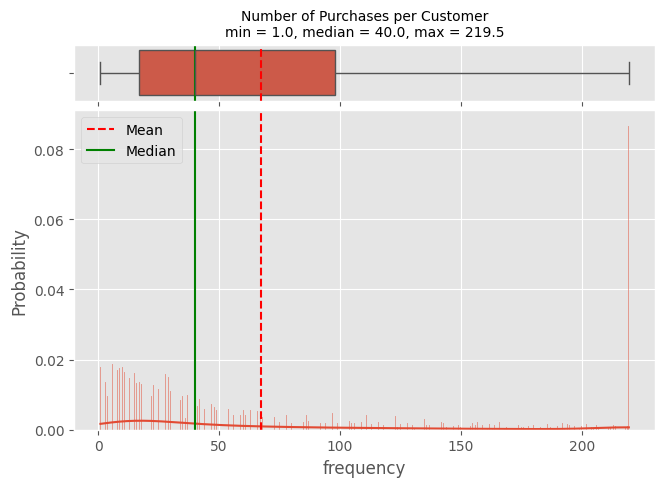

Q1 = 17.0
Q2 = 40.0
Q3 = 98.0


In [ ]:
# Frequency data distribution
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5, 5),
                               gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Title for the boxplot
ax1.set_title(f"Number of Purchases per Customer\n"
              f"min = {rfm_kmeans['frequency'].min()}, "
              f"median = {rfm_kmeans['frequency'].median()}, "
              f"max = {rfm_kmeans['frequency'].max()}",
              color="black", fontsize=10)

# Boxplot for frequency
sns.boxplot(x=rfm_kmeans['frequency'], ax=ax1)
ax1.axvline(rfm_kmeans['frequency'].mean(), color='r', linestyle='--', label='Mean')
ax1.axvline(rfm_kmeans['frequency'].median(), color='g', linestyle='-', label='Median')
ax1.set(xlabel="")

# Histogram for frequency
sns.histplot(data=rfm_kmeans['frequency'], ax=ax2, stat="probability", kde=True, bins=1000)
ax2.axvline(rfm_kmeans['frequency'].mean(), color='r', linestyle='--', label='Mean')
ax2.axvline(rfm_kmeans['frequency'].median(), color='g', linestyle='-', label='Median')

# Add a legend to the plot
ax2.legend()

# Display the plot
plt.show()

# Print quantiles
print(f"Q1 = {rfm_kmeans['frequency'].quantile(0.25)}")
print(f"Q2 = {rfm_kmeans['frequency'].quantile(0.5)}")
print(f"Q3 = {rfm_kmeans['frequency'].quantile(0.75)}")



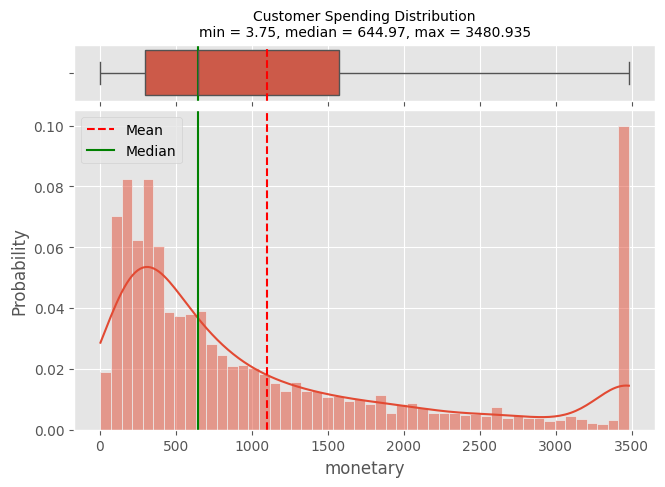

Q1 = 298.18500000000006
Q2 = 644.9749999999999
Q3 = 1571.285


In [ ]:
# Monetary data distribution
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5, 5),
                               gridspec_kw={"height_ratios": (.15, .85),
                                            "hspace": 0.05})

# Title for the boxplot
ax1.set_title(f"Customer Spending Distribution\n"
              f"min = {rfm_kmeans['monetary'].min()}, "
              f"median = {round(rfm_kmeans['monetary'].median(), 2)}, "
              f"max = {rfm_kmeans['monetary'].max()}",
              color="black", fontsize=10)

# Boxplot for monetary
sns.boxplot(x=rfm_kmeans['monetary'], ax=ax1)
ax1.axvline(rfm_kmeans['monetary'].mean(), color='r', linestyle='--', label='Mean')
ax1.axvline(rfm_kmeans['monetary'].median(), color='g', linestyle='-', label='Median')
ax1.set(xlabel="")

# Histogram for monetary
sns.histplot(data=rfm_kmeans['monetary'], ax=ax2, stat="probability", kde=True, bins=50)
ax2.axvline(rfm_kmeans['monetary'].mean(), color='r', linestyle='--', label='Mean')
ax2.axvline(rfm_kmeans['monetary'].median(), color='g', linestyle='-', label='Median')

# Add a legend to the plot
ax2.legend()

# Display the plot
plt.show()

# Print quantiles
print(f"Q1 = {rfm_kmeans['monetary'].quantile(0.25)}")
print(f"Q2 = {rfm_kmeans['monetary'].quantile(0.5)}")
print(f"Q3 = {rfm_kmeans['monetary'].quantile(0.75)}")



In [ ]:
# Normal test, skewness and data distribution

# Identifying numerical columns
numerical = ['recency', 'frequency', 'monetary']

from scipy.stats import normaltest

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = normaltest(rfm_kmeans[feature_name].dropna())

    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    skewness = rfm_kmeans[feature_name].skew()

    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"

    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature",
                                                     "D'Agostino-Pearson Statistic",
                                                     "P-value",
                                                     "Distribution",
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,recency,583.200928,2.288377e-127,Not Normally Distributed,1.163469,Right Skew
1,frequency,589.373112,1.045334e-128,Not Normally Distributed,1.170132,Right Skew
2,monetary,589.807769,8.411440e-129,Not Normally Distributed,1.173867,Right Skew


* We have observed that our 'recency', 'frequency', 'monetary' data are assymetrical, not-normally distributed and skewed to the right.

**Data transformation**

As our data are not symetrically distributed, We will conduct transformation of these 'recency', 'frequency', 'monetary' data. Because our data do not contain negative value, We can use box-cox transformation to make our data become symetrical.

In [ ]:
# Transforming using Box-Cox transformation

# Function for Box-Cox transformation
def apply_boxcox(df):
    # Initialize an empty DataFrame to store the transformed data
    transformed_df = pd.DataFrame()

    # Iterate over each column in the dataframe
    for col in df.columns:
        # Ensure all data is positive, since Box-Cox requires positive values
        if (df[col] <= 0).any():
            # Shift the column values to be positive if necessary
            shifted_data = df[col] - df[col].min() + 1
        else:
            shifted_data = df[col]

        # Apply the Box-Cox transformation
        transformed_data, _ = boxcox(shifted_data)
        transformed_df[col] = transformed_data

    return transformed_df

# Apply Box-Cox transformation to the entire dataframe
rfm_kmeans_transformed = apply_boxcox(rfm_kmeans)

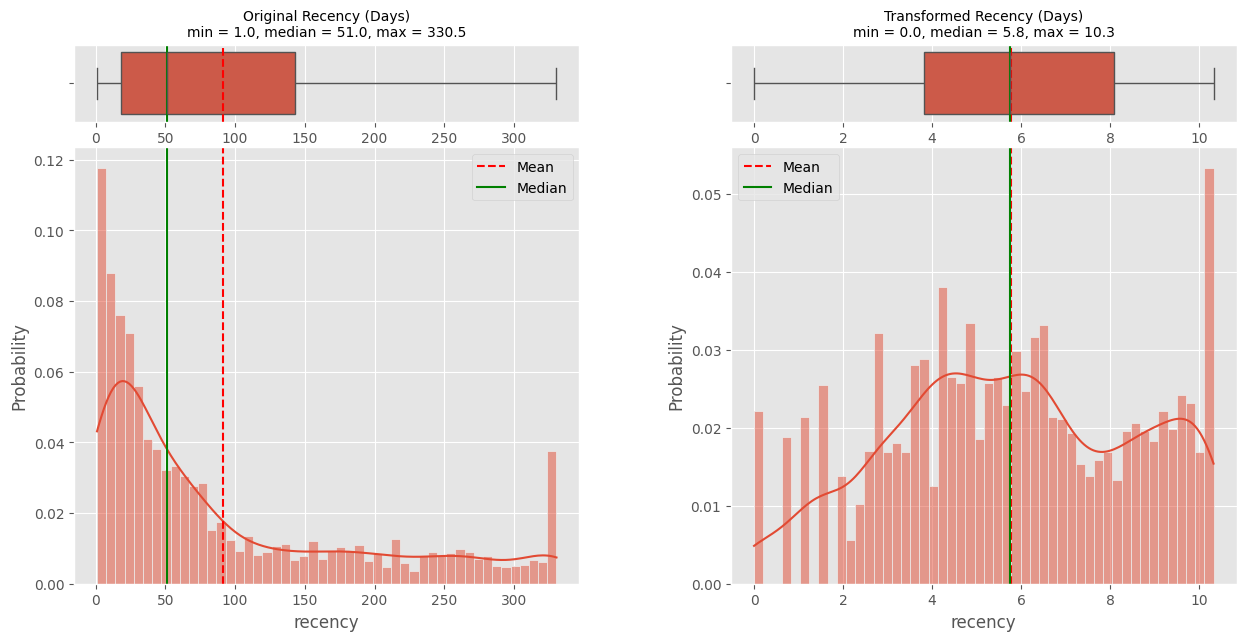

In [ ]:
# Comparing 'recency' distribution of transformed data and non-transformed data

# Creating subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 7),
                         gridspec_kw={"height_ratios": (.15, .85),
                                      "hspace": 0.1, "wspace": 0.3})

# Title for the boxplots
axes[0, 0].set_title(f"Original Recency (Days)\n"
                     f"min = {round(rfm_kmeans['recency'].min(), 1)}, "
                     f"median = {round(rfm_kmeans['recency'].median(),1)}, "
                     f"max = {round(rfm_kmeans['recency'].max(),1)}",
                     color="black", fontsize=10)

axes[0, 1].set_title(f"Transformed Recency (Days)\n"
                     f"min = {round(rfm_kmeans_transformed['recency'].min(),1)}, "
                     f"median = {round(rfm_kmeans_transformed['recency'].median(),1)}, "
                     f"max = {round(rfm_kmeans_transformed['recency'].max(),1)}",
                     color="black", fontsize=10)

# Boxplot for original recency
sns.boxplot(x=rfm_kmeans['recency'], ax=axes[0, 0])
axes[0, 0].axvline(rfm_kmeans['recency'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].axvline(rfm_kmeans['recency'].median(), color='g', linestyle='-', label='Median')
axes[0, 0].set(xlabel="")
#axes[0, 0].legend()

# Boxplot for transformed recency
sns.boxplot(x=rfm_kmeans_transformed['recency'], ax=axes[0, 1])
axes[0, 1].axvline(rfm_kmeans_transformed['recency'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 1].axvline(rfm_kmeans_transformed['recency'].median(), color='g', linestyle='-', label='Median')
axes[0, 1].set(xlabel="")
#axes[0, 1].legend()

# Histogram for original recency
sns.histplot(data=rfm_kmeans['recency'], ax=axes[1, 0], stat="probability", kde=True, bins=50)
axes[1, 0].axvline(rfm_kmeans['recency'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 0].axvline(rfm_kmeans['recency'].median(), color='g', linestyle='-', label='Median')
axes[1, 0].set_ylabel("Probability")
axes[1, 0].legend()

# Histogram for transformed recency
sns.histplot(data=rfm_kmeans_transformed['recency'], ax=axes[1, 1], stat="probability", kde=True, bins=50)
axes[1, 1].axvline(rfm_kmeans_transformed['recency'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 1].axvline(rfm_kmeans_transformed['recency'].median(), color='g', linestyle='-', label='Median')
axes[1, 1].set_ylabel("Probability")
axes[1, 1].legend()

# Displaying plot
plt.tight_layout()
plt.show()


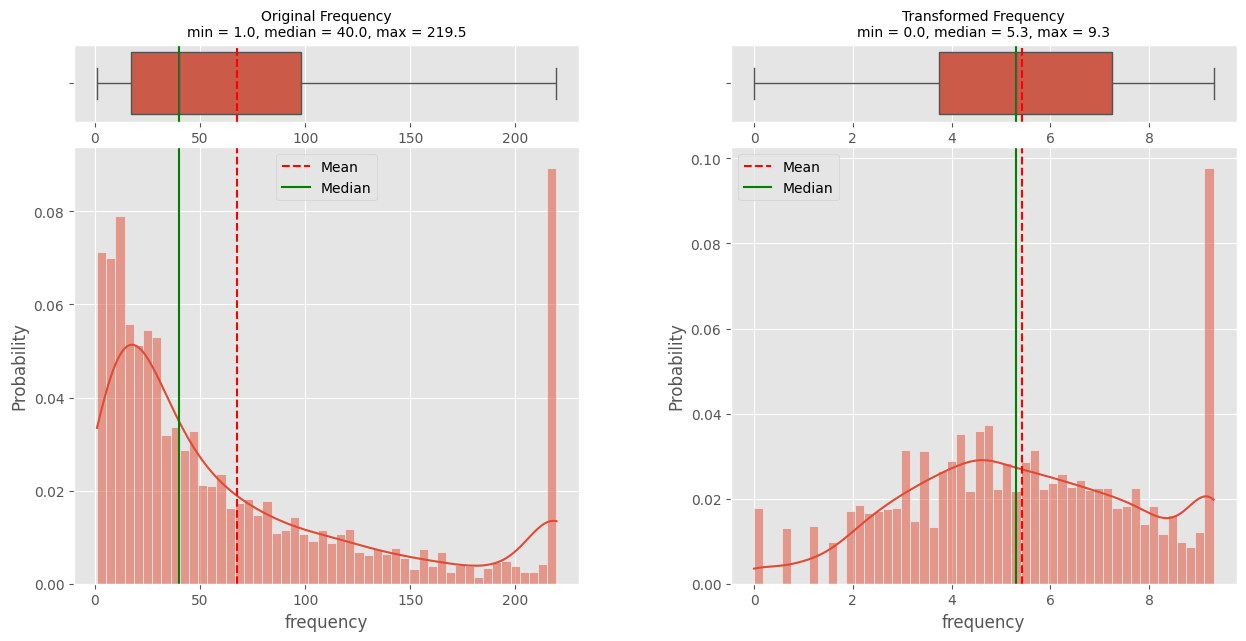

In [ ]:
# Comparing 'frequency' distribution of transformed data and non-transformed data

# Creating subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 7),
                         gridspec_kw={"height_ratios": (.15, .85),
                                      "hspace": 0.1, "wspace": 0.3})

# Title for the boxplots
axes[0, 0].set_title(f"Original Frequency\n"
                     f"min = {round(rfm_kmeans['frequency'].min(), 1)}, "
                     f"median = {round(rfm_kmeans['frequency'].median(), 1)}, "
                     f"max = {round(rfm_kmeans['frequency'].max(), 1)}",
                     color="black", fontsize=10)

axes[0, 1].set_title(f"Transformed Frequency\n"
                     f"min = {round(rfm_kmeans_transformed['frequency'].min(), 1)}, "
                     f"median = {round(rfm_kmeans_transformed['frequency'].median(), 1)}, "
                     f"max = {round(rfm_kmeans_transformed['frequency'].max(), 1)}",
                     color="black", fontsize=10)

# Boxplot for original frequency
sns.boxplot(x=rfm_kmeans['frequency'], ax=axes[0, 0])
axes[0, 0].axvline(rfm_kmeans['frequency'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].axvline(rfm_kmeans['frequency'].median(), color='g', linestyle='-', label='Median')
axes[0, 0].set(xlabel="")
#axes[0, 0].legend()

# Boxplot for transformed frequency
sns.boxplot(x=rfm_kmeans_transformed['frequency'], ax=axes[0, 1])
axes[0, 1].axvline(rfm_kmeans_transformed['frequency'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 1].axvline(rfm_kmeans_transformed['frequency'].median(), color='g', linestyle='-', label='Median')
axes[0, 1].set(xlabel="")
#axes[0, 1].legend()

# Histogram for original frequency
sns.histplot(data=rfm_kmeans['frequency'], ax=axes[1, 0], stat="probability", kde=True, bins=50)
axes[1, 0].axvline(rfm_kmeans['frequency'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 0].axvline(rfm_kmeans['frequency'].median(), color='g', linestyle='-', label='Median')
axes[1, 0].set_ylabel("Probability")
axes[1, 0].legend()

# Histogram for transformed frequency
sns.histplot(data=rfm_kmeans_transformed['frequency'], ax=axes[1, 1], stat="probability", kde=True, bins=50)
axes[1, 1].axvline(rfm_kmeans_transformed['frequency'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 1].axvline(rfm_kmeans_transformed['frequency'].median(), color='g', linestyle='-', label='Median')
axes[1, 1].set_ylabel("Probability")
axes[1, 1].legend()

# Displaying plot
plt.show()

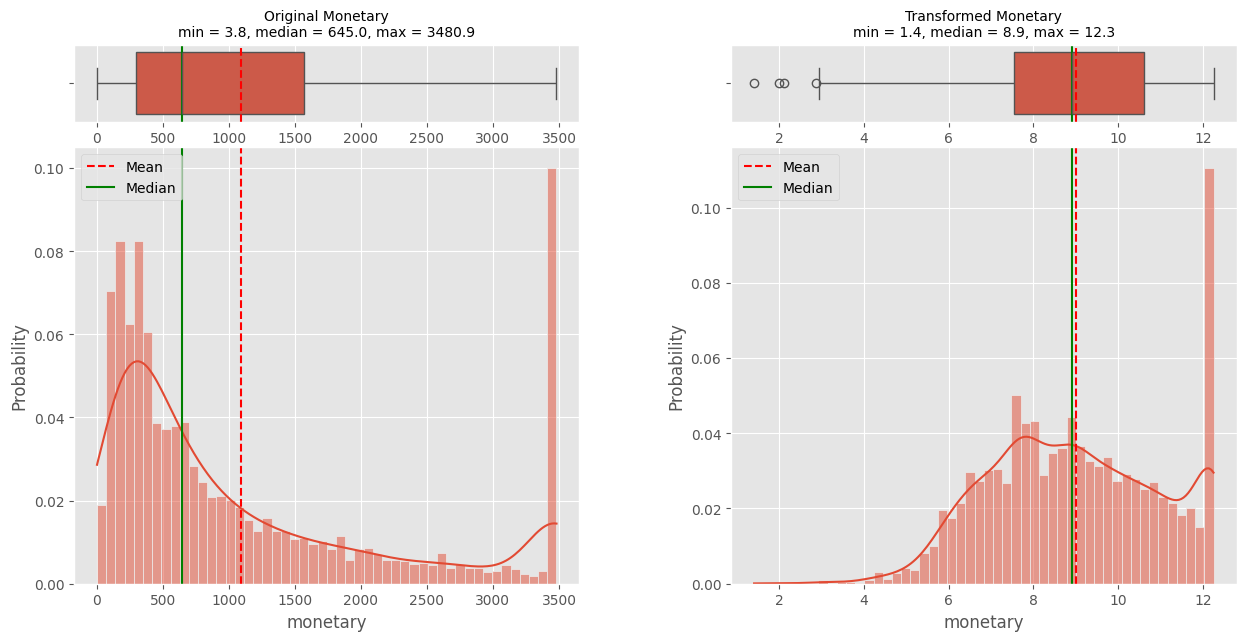

In [ ]:
# Comparing 'monetary' distribution of transformed data and non-transformed data

# Creating subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 7),
                         gridspec_kw={"height_ratios": (.15, .85),
                                      "hspace": 0.1, "wspace": 0.3})

# Title for the boxplots
axes[0, 0].set_title(f"Original Monetary\n"
                     f"min = {round(rfm_kmeans['monetary'].min(), 1)}, "
                     f"median = {round(rfm_kmeans['monetary'].median(), 1)}, "
                     f"max = {round(rfm_kmeans['monetary'].max(), 1)}",
                     color="black", fontsize=10)

axes[0, 1].set_title(f"Transformed Monetary\n"
                     f"min = {round(rfm_kmeans_transformed['monetary'].min(), 1)}, "
                     f"median = {round(rfm_kmeans_transformed['monetary'].median(), 1)}, "
                     f"max = {round(rfm_kmeans_transformed['monetary'].max(), 1)}",
                     color="black", fontsize=10)

# Boxplot for original monetary
sns.boxplot(x=rfm_kmeans['monetary'], ax=axes[0, 0])
axes[0, 0].axvline(rfm_kmeans['monetary'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 0].axvline(rfm_kmeans['monetary'].median(), color='g', linestyle='-', label='Median')
axes[0, 0].set(xlabel="")
#axes[0, 0].legend()

# Boxplot for transformed monetary
sns.boxplot(x=rfm_kmeans_transformed['monetary'], ax=axes[0, 1])
axes[0, 1].axvline(rfm_kmeans_transformed['monetary'].mean(), color='r', linestyle='--', label='Mean')
axes[0, 1].axvline(rfm_kmeans_transformed['monetary'].median(), color='g', linestyle='-', label='Median')
axes[0, 1].set(xlabel="")
#axes[0, 1].legend()

# Histogram for original monetary
sns.histplot(data=rfm_kmeans['monetary'], ax=axes[1, 0], stat="probability", kde=True, bins=50)
axes[1, 0].axvline(rfm_kmeans['monetary'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 0].axvline(rfm_kmeans['monetary'].median(), color='g', linestyle='-', label='Median')
axes[1, 0].set_ylabel("Probability")
axes[1, 0].legend()

# Histogram for transformed monetary
sns.histplot(data=rfm_kmeans_transformed['monetary'], ax=axes[1, 1], stat="probability", kde=True, bins=50)
axes[1, 1].axvline(rfm_kmeans_transformed['monetary'].mean(), color='r', linestyle='--', label='Mean')
axes[1, 1].axvline(rfm_kmeans_transformed['monetary'].median(), color='g', linestyle='-', label='Median')
axes[1, 1].set_ylabel("Probability")
axes[1, 1].legend()

# Displaying plot
plt.show()

We have transformed the data of 'recency', 'frequency', and 'monitory'. However, the data may still contains outliers based and not perfectly symetrical based on histogram visual.

**Scaling**

Scaling is a preprocessing technique to adjust the range and distribution of numerical features in a dataset. The goal of scaling is to standardize or normalize features so that they contribute equally to the analysis or model training. Scaling helps to achieve consistency in the input data, which can be crucial for the performance and accuracy of machine learning models. Scaling is important process before K-means Clustering as it can help in
* **Equal Weighting**: K-means clustering algorithm relies on distance metrics (usually Euclidean distance) to partition the data. If features are on different scales, features with larger scales will disproportionately influence the clustering results. Scaling ensures all features contribute equally to the distance calculation.
* **Improved Performance**: Scaling can improve the performance and convergence of the k-means algorithm, leading to more accurate and meaningful clusters.

We will use robust scaler for scaling as this method is robust to the presence of outliers.

In [ ]:
# Scaling by using robust scaler
# Robust scaler
scaler = RobustScaler()

# Apply scaling
rfm_kmeans_scaled = scaler.fit_transform(rfm_kmeans)

In [ ]:
# Displaying the result of scaling
rfm_kmeans_scaled_df = pd.DataFrame(rfm_kmeans_scaled, columns=rfm_kmeans.columns)

rfm_kmeans_scaled_df.head()

,recency,frequency,monetary
0,2.200,-0.481481,2.227602
1,-0.392,0.777778,2.227602
2,-0.400,2.216049,2.227602
3,-0.376,1.962963,2.227602
4,-0.384,0.234568,0.233576


**Determining the optimal number of cluster**

There are several approaches to determine the number optimal cluster that consist of:

* **Elbow method**

This method looks at the sum of squared distances (inertia) between data points and their assigned cluster centroids. As the number of clusters increases, this sum decreases, because the points are closer to the centroids. The "elbow point," where the rate of decrease sharply slows down, suggests an optimal number of clusters. This point indicates a balance between the number of clusters and the within-cluster variance.

* **Silhouette Score**

The Silhouette Score measures how similar each point is to its own cluster compared to other clusters. It ranges from -1 to 1, where a score closer to 1 indicates that the point is well-matched to its own cluster and poorly matched to other clusters. The number of clusters with the highest average silhouette score is considered optimal.

* **Davies-Bouldin Index**

This index evaluates the average similarity ratio of each cluster with its most similar cluster, considering both intra-cluster and inter-cluster distances. Lower values indicate better clustering. The number of clusters with the lowest Davies-Bouldin Index is considered optimal.





Now, we want to perform elbow method and silhoutte score to find the optimal cluster

**Elbow Method and Silhoutte score**

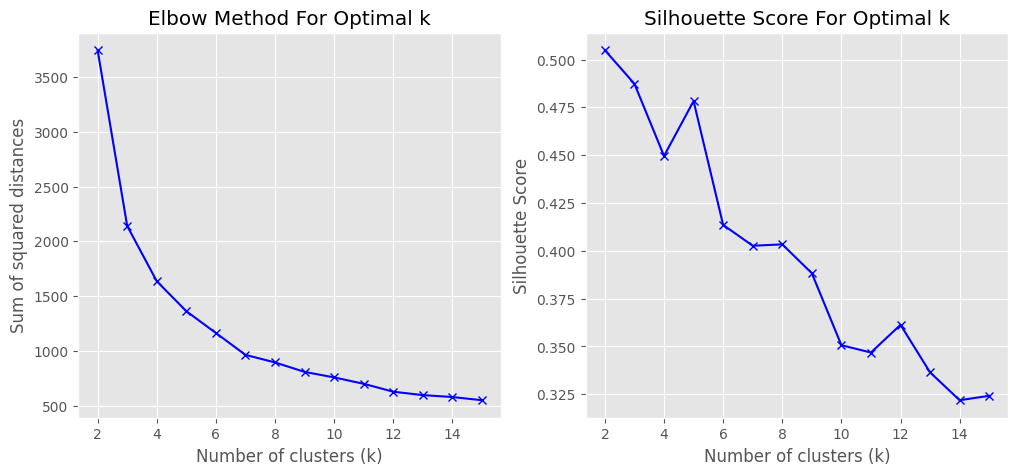

In [ ]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 16)  # Trying different numbers of clusters, starting from 2

for k in K:
    # Fit KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_kmeans_scaled)

    # Calculate the sum of squared distances (inertia)
    Sum_of_squared_distances.append(kmeans.inertia_)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(rfm_kmeans_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the elbow method
plt.figure(figsize=(12, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')

plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store the results
sum_of_squared_distances = []
silhouette_scores = []
num_clusters = list(range(2, 16))

# Loop through each number of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_kmeans_scaled)

    sum_of_squared_distances.append(kmeans.inertia_)

    if k > 1:  # Silhouette score is only valid for k > 1
        silhouette_avg = silhouette_score(rfm_kmeans_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)  # No silhouette score for k=1

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Number of Clusters': num_clusters,
    'Sum of Squared Distances': sum_of_squared_distances,
    'Silhouette Score': silhouette_scores
})

results_df


,Number of Clusters,Sum of Squared Distances,Silhouette Score
0,2,3746.063108,0.504892
1,3,2141.093119,0.487308
2,4,1636.017216,0.449600
3,5,1362.439261,0.478286
4,6,1163.170054,0.413545
5,7,963.178236,0.402646
6,8,894.061357,0.403358
7,9,807.697319,0.388275
8,10,757.264710,0.350636
9,11,698.883612,0.346792


* Based on the result of elbow method above, we can see the curve bends and the inertia start decreasing after k=3, k=4, k=5.
* Based on the silhoette score, the highest score k=2, k=3, and k=5.
Because of the variability of these results, we will also perform simulation and calculate davies_bouldin_score

**t-SNE Visualization**

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique often used to visualize high-dimensional data by visualizing clusters that K-means algorithm has formed. In this case, t-SNE visualization helps to understand how well the K-Means algorithm has grouped the customers. Different colors represent different cluster formed. The clearer the separation of clusters in the t-SNE plot, the better the clustering.

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

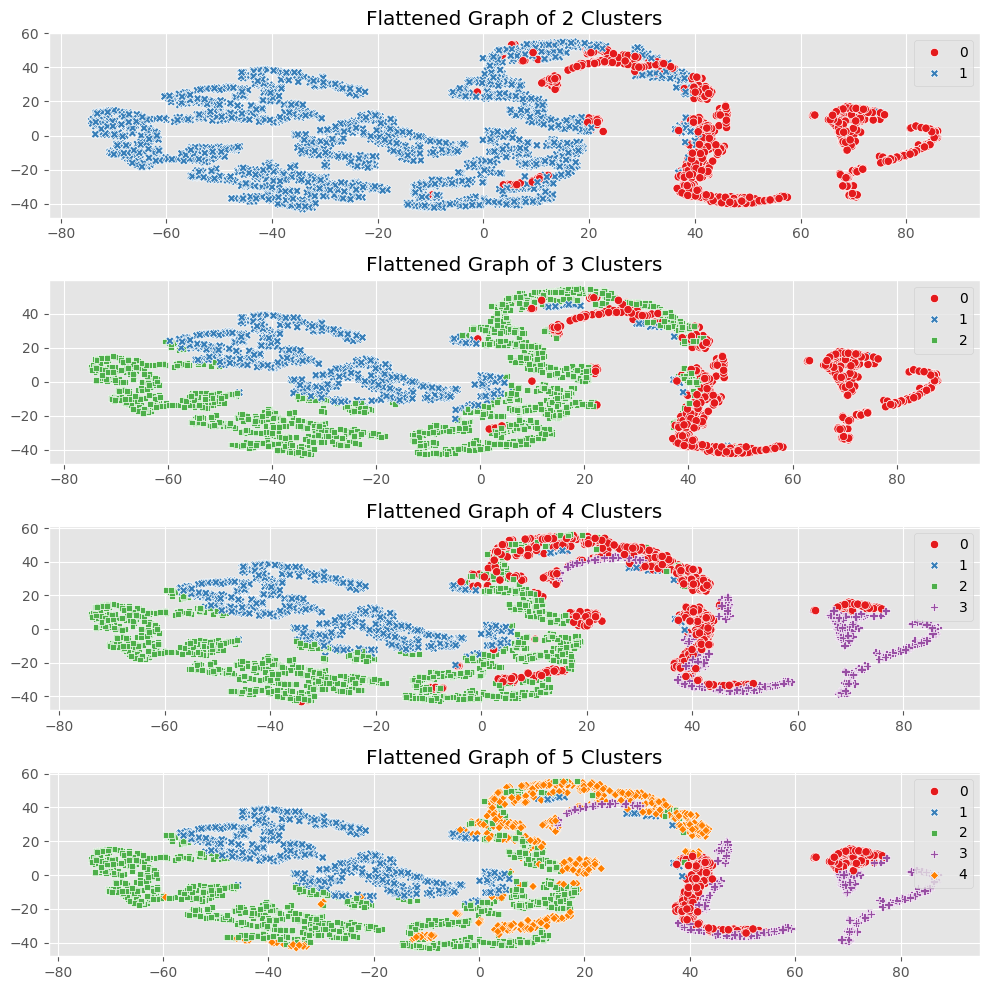

In [ ]:
# Visualizing cluster by using t-SNE

from sklearn.manifold import TSNE

plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
df_rfm_k2 = kmeans(rfm_kmeans_scaled_df, 2, rfm_kmeans)

plt.subplot(4, 1, 2)
df_rfm_k3 = kmeans(rfm_kmeans_scaled_df, 3, rfm_kmeans)

plt.subplot(4, 1, 3)
df_rfm_k4 = kmeans(rfm_kmeans_scaled_df, 4, rfm_kmeans)

plt.subplot(4, 1, 4)
df_rfm_k5 = kmeans(rfm_kmeans_scaled_df, 5, rfm_kmeans)

plt.tight_layout()

**t-SNE Interpretation**

**Number of clusters = 2**
* The data distribution is split into two distinct groups, but there may still be some overlap.
  
**Number of clusters = 3**
* The three clusters seem more distinct and separated compared to the 2-cluster model.
  
**Number of clusters = 4**
* With 4 clusters, we start to see more detailed separation, though some clusters might be less distinct.
  
**Number of clusters = 5**
* The clusters are divided further, but the separation may not be as clear as with 3 clusters, potentially leading to overfitting.

In [ ]:
df_rfm_k3

,recency,frequency,monetary,Cluster
0,326.0,1.0,3480.935,1
1,2.0,103.0,3480.935,0
2,1.0,219.5,3480.935,0
3,4.0,199.0,3480.935,0
4,3.0,59.0,942.340,2
...,...,...,...,...
3915,278.0,10.0,180.600,1
3916,181.0,7.0,80.820,1
3917,8.0,12.0,178.050,2
3918,4.0,219.5,2045.530,0


**Snake plot**

A snake plot is used to compare the average RFM (Recency, Frequency, Monetary) values for each cluster. It helps to understand the characteristics of each cluster.

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=rfm_kmeans.index,
                                       columns=rfm_kmeans.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['Cluster'],
                        value_vars=['recency', 'frequency', 'monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

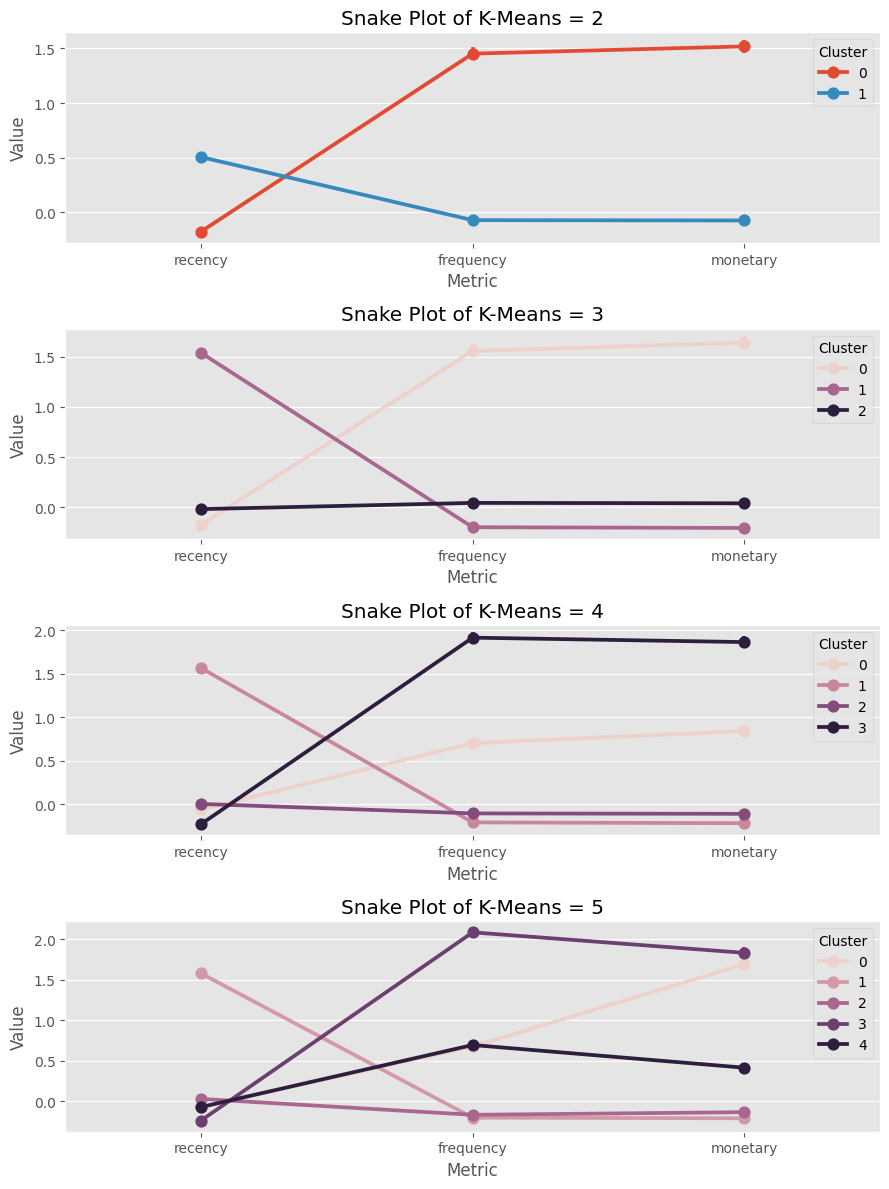

In [ ]:
plt.figure(figsize=(9, 12))

plt.subplot(4, 1, 1)
plt.title('Snake Plot of K-Means = 2')
snake_plot(rfm_kmeans_scaled, df_rfm_k2, rfm_kmeans)

plt.subplot(4, 1, 2)
plt.title('Snake Plot of K-Means = 3')
snake_plot(rfm_kmeans_scaled, df_rfm_k3, rfm_kmeans)

plt.subplot(4, 1, 3)
plt.title('Snake Plot of K-Means = 4')
snake_plot(rfm_kmeans_scaled, df_rfm_k4, rfm_kmeans)

plt.subplot(4, 1, 4)
plt.title('Snake Plot of K-Means = 5')
snake_plot(rfm_kmeans_scaled, df_rfm_k5, rfm_kmeans)

plt.tight_layout()

**Snake plot interpretation**

**Number of clusters = 2**
* Cluster 0 has higher recency (meaning they purchased less recently) but lower frequency and monetary value, indicating possibly less valuable customers. Cluster 1 has lower recency but higher frequency and monetary value, indicating more valuable customers.

**Number of clusters = 3**
* We can identify a more nuanced segmentation where Cluster 2 could represent the best customers with the highest frequency and monetary value, Cluster 0 might represent at-risk customers, and Cluster 1 might represent active customers.

**Number of clusters = 4 and 5**
* The snake plots become more complex, with more specific distinctions among customer groups. However, the clarity of segmentation might decrease, and over-segmentation could make it harder to derive actionable insights.

**David Bouldin Score**

Davies Boulidng score is a metric used for evaluating clustering algorithm. Lower values indicate better clustering. Now, we will calculate the David Bouldin score and compare it to silhoutte score.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define the range of clusters to check
K = range(2, 6)

# Initialize lists to store the results
silhouette_scores = []
davies_bouldin_indices = []

# Loop through each number of clusters
for k in K:
    # Fit KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_kmeans_scaled)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_kmeans_scaled, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(rfm_kmeans_scaled, labels)
    davies_bouldin_indices.append(db_index)

    # Print the results
    print(f"Number of Clusters: {k}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {db_index}\n")

# Create a DataFrame to store and compare the results
results_df = pd.DataFrame({
    'Number of Clusters': K,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_indices
})

# Display the DataFrame
results_df


Number of Clusters: 2
Silhouette Score: 0.5048920558776475
Davies-Bouldin Index: 0.8025723500084466

Number of Clusters: 3
Silhouette Score: 0.4873077472414131
Davies-Bouldin Index: 0.7083351369941792

Number of Clusters: 4
Silhouette Score: 0.44959965578883165
Davies-Bouldin Index: 0.8697459695005724

Number of Clusters: 5
Silhouette Score: 0.4782856023313259
Davies-Bouldin Index: 0.8458570140215521



,Number of Clusters,Silhouette Score,Davies-Bouldin Index
0,2,0.504892,0.802572
1,3,0.487308,0.708335
2,4,0.449600,0.869746
3,5,0.478286,0.845857


It turns out that K-means with 3 cluster has the lowest Davies-Bouldin score.

Based on the result both the Silhouette Score and the Davies-Bouldin Index,

**Number of Clusters = 2**
* Silhouette Score (0.5049): This is the highest among the tested cluster numbers, indicating well-defined clusters.
* Davies-Bouldin Index (0.8026): Although not the lowest, it is reasonably low, suggesting that the clusters are fairly well-separated.
  
**Number of clusters = 3**
* Silhouette Score (0.4873): Slightly lower than the 2-cluster solution, suggesting that clusters are still well-defined but not as strong as the 2-cluster configuration.
* Davies-Bouldin Index (0.7083): This is the lowest, indicating that clusters are the best separated compared to other configurations.
  
**Number of cluster = 4 & 5**
* Both have lower Silhouette Scores and higher Davies-Bouldin Indices compared to 2 and 3 clusters, indicating that the clustering quality decreases as the number of clusters increases beyond 3.

**Recommendation**
* Overall, between the k=2 and k=3 , the k=3 solution is more balanced, offering a good trade-off between well-defined clusters and good separation. In addition, we want to prioritize better separation between customer so will prioritize lower Davies-Bouldin index.

In [ ]:
df_rfm_k3['Cluster'].value_counts()

,count
Cluster,
2,2052
1,949
0,919


**Interprete the cluster to identify customer segments**

After we decide that 3 cluster are likely the best option for segmentation, now we will apply the k-means model with 3 clusters.

In [ ]:
# Initialize the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled data
kmeans.fit(rfm_kmeans_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Predict cluster labels for the original data
cluster_labels = kmeans.predict(rfm_kmeans_scaled)

# Add the cluster labels to the original dataframe
rfm_kmeans['Cluster'] = cluster_labels

In [ ]:
# Analyze each cluster
cluster_analysis = rfm_kmeans.groupby('Cluster').mean()

cluster_analysis

,recency,frequency,monetary
Cluster,,,
0,242.825472,23.873166,381.116352
1,48.217265,43.956838,702.666922
2,29.299226,167.168142,2751.754100


In [ ]:
# Analyze each cluster
cluster_analysis1 = rfm_kmeans.groupby('Cluster').median()

cluster_analysis1

,recency,frequency,monetary
Cluster,,,
0,242.5,17.0,293.785
1,39.0,35.0,580.085
2,16.0,184.5,3033.735


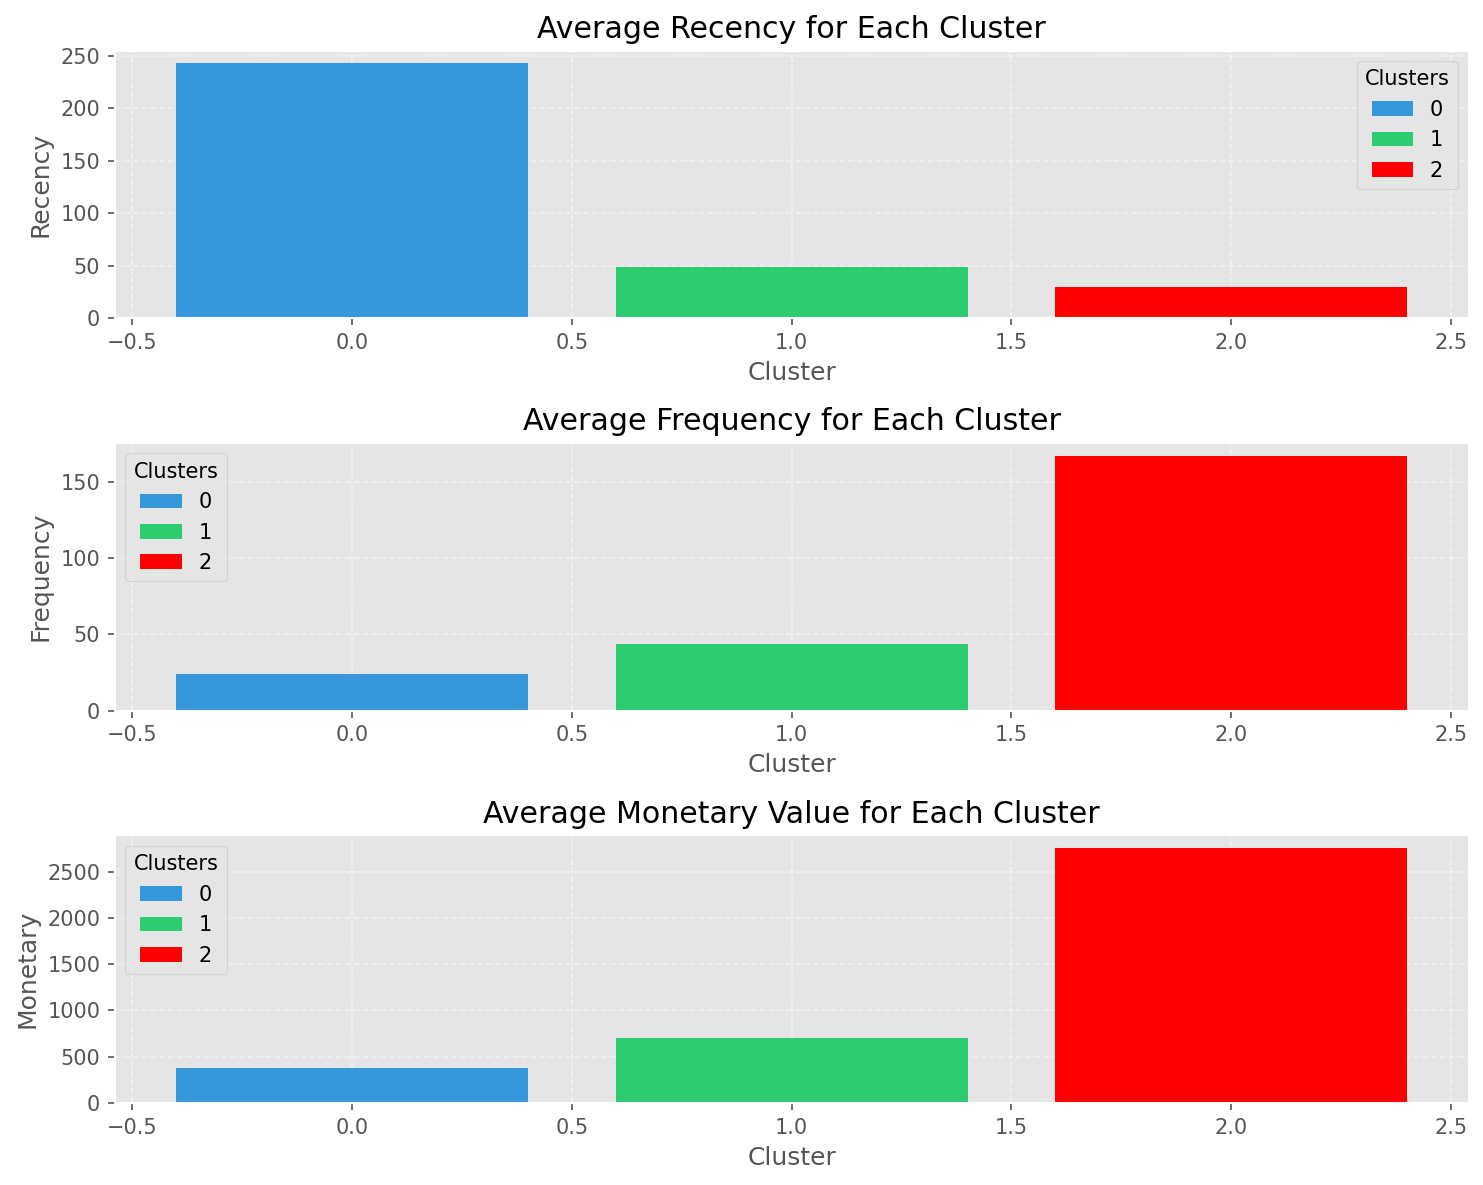

In [ ]:
colors = ['#3498db', '#2ecc71', '#FF0000']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_analysis.index, cluster_analysis['recency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_analysis.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_analysis.index, cluster_analysis['frequency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_analysis.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_analysis.index, cluster_analysis['monetary'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_analysis.index, title='Clusters')

plt.tight_layout()
plt.show()

After getting to know the RFM values of each cluster, It is also crucial to know what percentage of customers are in the different segments. So, we will visualize the proportion using a pie chart

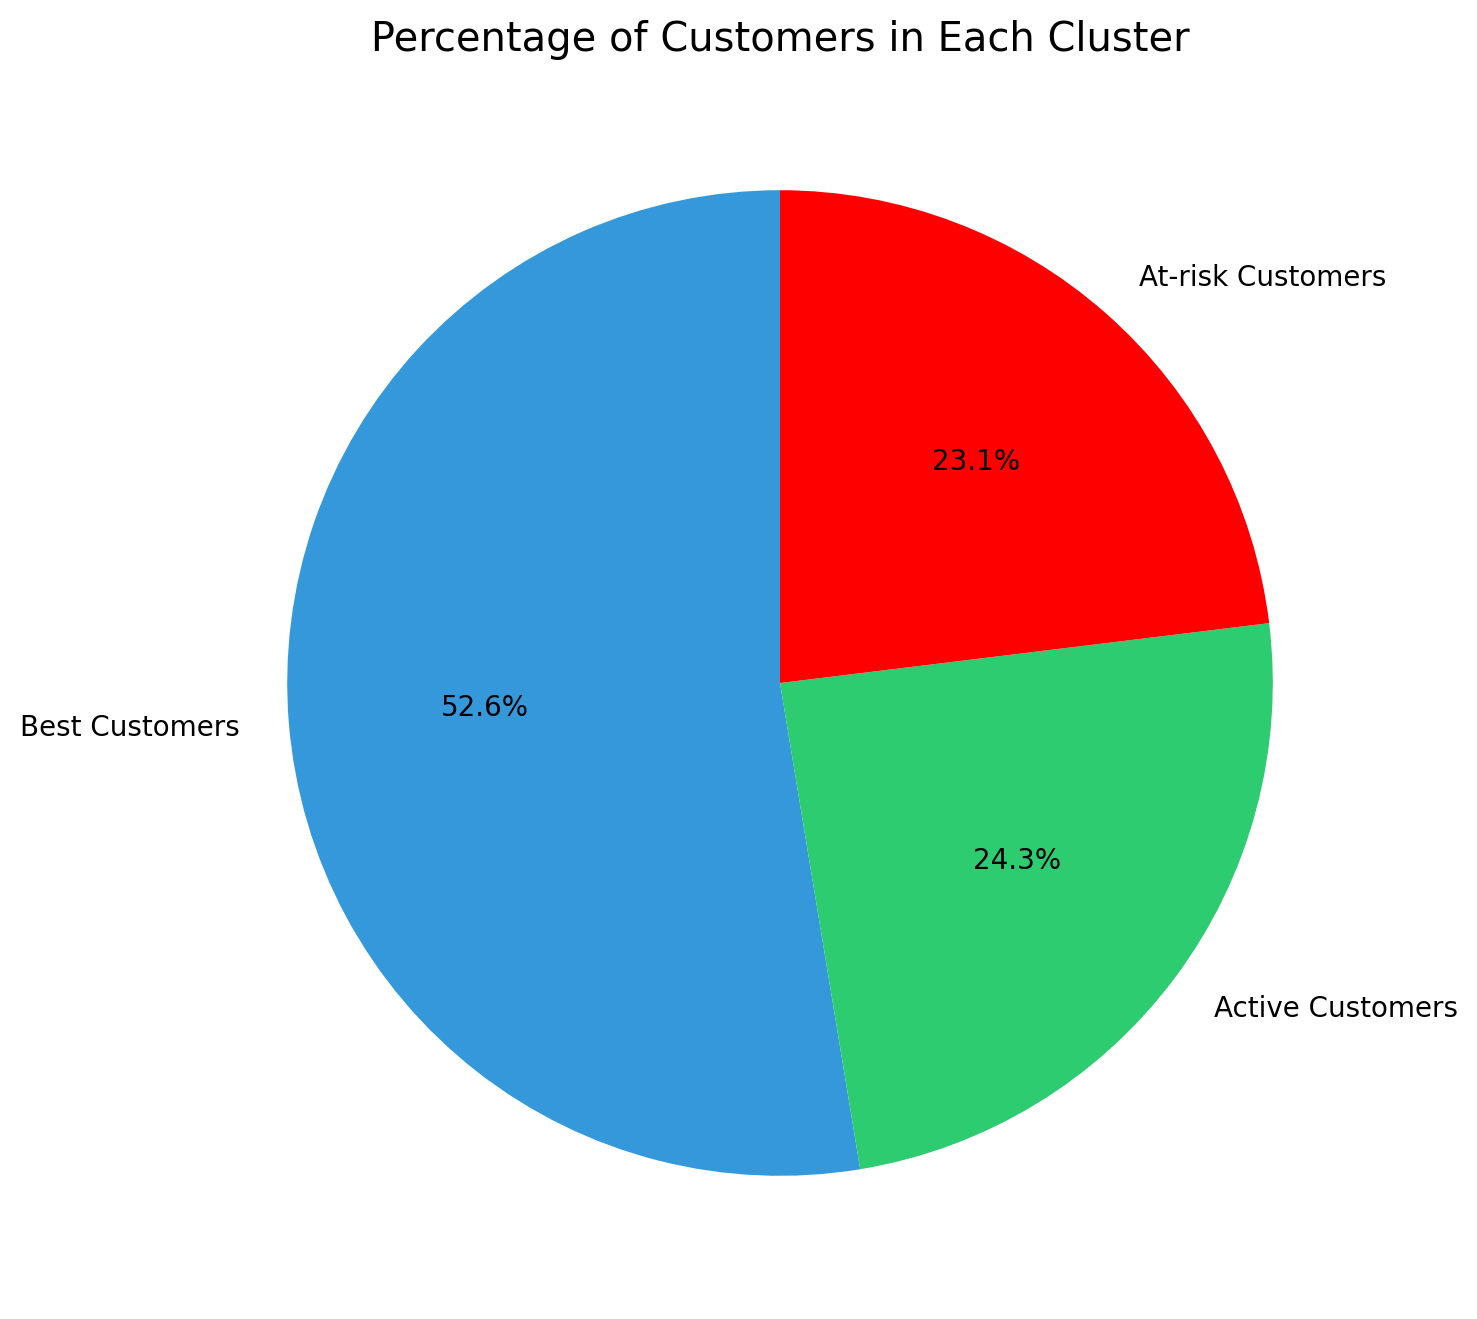

In [ ]:
# Calculating the percentage of customer in each cluster

# Calculating number
cluster_counts = rfm_kmeans['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#FF0000']

# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Best Customers', 'Active Customers', 'At-risk Customers']

# Create a pie chart
plt.figure(figsize=(8, 8), dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')

plt.show()


## **Insights and Recommendations**

### **Insights**

**Cluster 0 (At Risk Customers)**
* This cluster has 23% customer. It is characterized by customers who have not made a purchase for a long time (high recency), make purchases relatively infrequently (low frequency), and have spent less overall (low monetary). This cluster might represent inactive or lapsed customers who need re-engagement or could be **at risk** of being lost.

**Cluster 1 (Active Customers)**
* This cluster has 24% of customers. Customers in this cluster made a purchase more recently than Cluster 0 (moderate recency), have a moderate purchase frequency, and have spent a moderate amount. This group might represent **active customers** who are somewhat engaged with your offerings, making regular purchases but not at the highest frequency or monetary value.

**Cluster 2 (Best Customers)**
* This cluster has 52% of customers. Customers in Cluster 2 are the most recently engaged (low recency), have the highest purchase frequency, and have spent the most money. This cluster likely represents your **best customers** who are highly engaged and contribute significantly to your revenue. They may be the focus for retention and loyalty programs.

### **Recommendation**

**At risk customers** (low recency, frequency, monetary): Re-engagement efforts a that include running discount or promotion to win them back)
* Reactivation Campaigns: Send personalized emails with special offers or discounts to encourage them to return. Consider highlighting products they previously showed interest in.
* Surveys: Reach out with a survey to understand why they stopped purchasing. Use this feedback to improve customer experience.
* Content Marketing: Share content that might reignite their interest in your products, such as blog posts, product reviews, or how-to guides.
* Retargeting Ads: Use retargeting ads to remind them of your products when they browse online.

**Active customers** (moderate frequency and monetary): Providing appreciation campaigns and rewards for loyalty
* Time-based Offers: Provide time-sensitive discounts or exclusive deals to create a sense of urgency.
* Loyalty Programs: Encourage repeat purchases by offering loyalty points for every purchase that can be redeemed for discounts or freebies.
* Personalized Recommendations: Use their purchase history to suggest new or related products.
* Customer Engagement: Send personalized follow-up emails after purchases, asking for reviews or offering tips on how to use the product.
  

**Best customers** (high frequency, high monetary): Focus on retention and more exclusive loyality programs. Personalized special discounts and other premium perks to make them valued and appreciated
* VIP Treatment: Provide exclusive benefits such as free shipping, special discounts, or early access to sales and new products.
* Personalized Communication: Send personalized thank-you notes, anniversary emails, or birthday discounts to strengthen the relationship.
* Exclusive Offers: Offer them access to limited-edition products or invite them to special events.
* Referral Programs: Encourage them to refer friends and family by offering rewards for successful referrals.